In [1]:
import os
import pickle
import json
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42
sns.set_context("talk")
sns.set_style("ticks")
%matplotlib inline

# sys.path.append("/gladstone/shipman/lab/Rebecca/scripts/retron_editor")
# import short_insertion_caller

In [2]:
pwd

'/gladstone/shipman/lab/Rebecca/Asim_large_edits/revisions'

In [77]:
# base_path = '/Users/rfang/hive_mount'
base_path = '/gladstone/shipman/lab'

PATHS = {
    'BaseSpace': f'{base_path}/BaseSpace',
    'home_drct': f'{base_path}/Rebecca/Asim_large_edits',
    
    'scratch_drct': '/wynton/scratch',
    # 'scratch_drct': os.getcwd(),
    'notebook_drct': os.getcwd(),
    'scripts': f'{base_path}/Rebecca/scripts/retron_editor'
}
with open('paths.ini', 'w') as handle:
    handle.write("[paths]\n")
    for k,v in PATHS.items():
        handle.write(f"{k} = {v}\n")

In [78]:
less paths.ini

[paths]
BaseSpace = /gladstone/shipman/lab/BaseSpace
home_drct = /gladstone/shipman/lab/Rebecca/Asim_large_edits
scratch_drct = /wynton/scratch
notebook_drct = /gladstone/shipman/lab/Rebecca/Asim_large_edits/revisions
scripts = /gladstone/shipman/lab/Rebecca/scripts/retron_editor


In [5]:
prefix = "msMRM_12_Live_Dead"
sample_key = pd.read_excel(f"{PATHS['notebook_drct']}/{prefix}_key.xlsx", header=0) # key.xlsx should be in same drct as notebook

In [6]:
# Asim demultiplexed into individual fastq files already
sample_key['f_in'] = sample_key.apply(lambda x: os.path.join(PATHS['BaseSpace'], x["run"], "AGK_Demultiplexed_for_RF", 
                                             f"{x['file_name']}.fastq"), axis=1)

In [7]:
sample_key

file_name        info  plasmid                    L_search_seq  \
0   msMRM_12_01_rep1  pAGK055_R1       55  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
1   msMRM_12_01_rep2  pAGK055_R2       55  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
2   msMRM_12_01_rep3  pAGK055_R3       55  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
3   msMRM_12_02_rep1  pAGK056_R1       56  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
4   msMRM_12_02_rep2  pAGK056_R2       56  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
5   msMRM_12_02_rep3  pAGK056_R3       56  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
6   msMRM_12_03_rep1  pAGK057_R1       57  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
7   msMRM_12_03_rep2  pAGK057_R2       57  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
8   msMRM_12_03_rep3  pAGK057_R3       57  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
9   msMRM_12_04_rep1  pAGK058_R1       58  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
10  msMRM_12_04_rep2  pAGK058_R2       58  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
11  msMRM_12_04_rep3  pAGK058_R3       58  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
12  msMRM_12_05_rep1  pAGK059_R1       59  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
13  msMRM_12_05_rep2  pAGK059_R2       59  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
14  msMRM_12_05_rep3  pAGK059_R3       59  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
15  msMRM_12_07_rep1  pAGK061_R1       61  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
16  msMRM_12_07_rep2  pAGK061_R2       61  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
17  msMRM_12_07_rep3  pAGK061_R3       61  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
18  msMRM_12_08_rep1  pAGK062_R1       62  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
19  msMRM_12_08_rep2  pAGK062_R2       62  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
20  msMRM_12_08_rep3  pAGK062_R3       62  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
21  msMRM_12_09_rep1  pAGK065_R1       65  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
22  msMRM_12_09_rep2  pAGK065_R2       65  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
23  msMRM_12_09_rep3  pAGK065_R3       65  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
24  msMRM_12_10_rep1  pAGK064_R1       64  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
25  msMRM_12_10_rep2  pAGK064_R2       64  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
26  msMRM_12_10_rep3  pAGK064_R3       64  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
27  msMRM_12_11_rep1  pAGK066_R1       66  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
28  msMRM_12_11_rep2  pAGK066_R2       66  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
29  msMRM_12_11_rep3  pAGK066_R3       66  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
30  msMRM_12_12_rep1  pAGK067_R1       67  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
31  msMRM_12_12_rep2  pAGK067_R2       67  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
32  msMRM_12_12_rep3  pAGK067_R3       67  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
33  msMRM_12_14_rep1  pAGK068_R1       68  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
34  msMRM_12_14_rep2  pAGK068_R2       68  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
35  msMRM_12_14_rep3  pAGK068_R3       68  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
36  msMRM_12_15_rep1  pAGK069_R1       69  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
37  msMRM_12_15_rep2  pAGK069_R2       69  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
38  msMRM_12_15_rep3  pAGK069_R3       69  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
39  msMRM_12_16_rep1  pAGK070_R1       70  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
40  msMRM_12_16_rep2  pAGK070_R2       70  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
41  msMRM_12_16_rep3  pAGK070_R3       70  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
42  msMRM_12_18_rep1  pAGK072_R1       72  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
43  msMRM_12_18_rep2  pAGK072_R2       72  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
44  msMRM_12_18_rep3  pAGK072_R3       72  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
45  msMRM_12_19_rep1  pAGK073_R1       73  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
46  msMRM_12_19_rep2  pAGK073_R2       73  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
47  msMRM_12_19_rep3  pAGK073_R3       73  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
48  msMRM_12_21_rep1  pAGK075_R1       75  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
49  msMRM_12_21_rep2  pAGK075_R2       75  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
50  msMRM_12_21_rep3  pAGK075_R3       75  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
51  msM

In [8]:
info_key = pd.read_excel(f"{PATHS['notebook_drct']}/Matching_Node_Plasmid.xlsx", header=0, dtype='str')

In [9]:
info_key = pd.melt(info_key,  value_vars=['Live Plasmid', 'Dead Plasmid'], id_vars=['Node'])
info_key['Catalytic'] = info_key['variable'].apply(lambda x: x.split(' ')[0])
info_key.rename(columns={'value': 'Plasmid'}, inplace=True)

In [10]:
info_key

Node      variable  Plasmid Catalytic
0       6  Live Plasmid  pAGK055      Live
1   412.1  Live Plasmid  pAGK056      Live
2     482  Live Plasmid  pAGK057      Live
3     814  Live Plasmid  pAGK058      Live
4    1429  Live Plasmid  pAGK059      Live
5    1438  Live Plasmid  pAGK060      Live
6    1467  Live Plasmid  pAGK061      Live
7    1531  Live Plasmid  pAGK062      Live
8    1765  Live Plasmid  pAGK064      Live
9    1795  Live Plasmid  pAGK065      Live
10      6  Dead Plasmid  pAGK066      Dead
11  412.1  Dead Plasmid  pAGK067      Dead
12    482  Dead Plasmid  pAGK068      Dead
13    814  Dead Plasmid  pAGK069      Dead
14   1429  Dead Plasmid  pAGK070      Dead
15   1438  Dead Plasmid  pAGK071      Dead
16   1467  Dead Plasmid  pAGK072      Dead
17   1531  Dead Plasmid  pAGK073      Dead
18   1765  Dead Plasmid  pAGK075      Dead
19   1795  Dead Plasmid  pAGK076      Dead

In [11]:
sample_key = sample_key.rename(columns={'info': 'sample'})
sample_key['Plasmid'] = sample_key['sample'].apply(lambda x: x.split('_')[0])

In [12]:
sample_key = sample_key.merge(info_key[['Plasmid', 'Node', 'Catalytic']], on='Plasmid', how='left')

In [13]:
sample_key

file_name      sample  plasmid                    L_search_seq  \
0   msMRM_12_01_rep1  pAGK055_R1       55  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
1   msMRM_12_01_rep2  pAGK055_R2       55  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
2   msMRM_12_01_rep3  pAGK055_R3       55  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
3   msMRM_12_02_rep1  pAGK056_R1       56  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
4   msMRM_12_02_rep2  pAGK056_R2       56  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
5   msMRM_12_02_rep3  pAGK056_R3       56  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
6   msMRM_12_03_rep1  pAGK057_R1       57  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
7   msMRM_12_03_rep2  pAGK057_R2       57  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
8   msMRM_12_03_rep3  pAGK057_R3       57  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
9   msMRM_12_04_rep1  pAGK058_R1       58  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
10  msMRM_12_04_rep2  pAGK058_R2       58  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
11  msMRM_12_04_rep3  pAGK058_R3       58  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
12  msMRM_12_05_rep1  pAGK059_R1       59  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
13  msMRM_12_05_rep2  pAGK059_R2       59  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
14  msMRM_12_05_rep3  pAGK059_R3       59  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
15  msMRM_12_07_rep1  pAGK061_R1       61  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
16  msMRM_12_07_rep2  pAGK061_R2       61  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
17  msMRM_12_07_rep3  pAGK061_R3       61  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
18  msMRM_12_08_rep1  pAGK062_R1       62  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
19  msMRM_12_08_rep2  pAGK062_R2       62  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
20  msMRM_12_08_rep3  pAGK062_R3       62  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
21  msMRM_12_09_rep1  pAGK065_R1       65  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
22  msMRM_12_09_rep2  pAGK065_R2       65  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
23  msMRM_12_09_rep3  pAGK065_R3       65  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
24  msMRM_12_10_rep1  pAGK064_R1       64  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
25  msMRM_12_10_rep2  pAGK064_R2       64  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
26  msMRM_12_10_rep3  pAGK064_R3       64  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
27  msMRM_12_11_rep1  pAGK066_R1       66  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
28  msMRM_12_11_rep2  pAGK066_R2       66  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
29  msMRM_12_11_rep3  pAGK066_R3       66  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
30  msMRM_12_12_rep1  pAGK067_R1       67  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
31  msMRM_12_12_rep2  pAGK067_R2       67  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
32  msMRM_12_12_rep3  pAGK067_R3       67  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
33  msMRM_12_14_rep1  pAGK068_R1       68  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
34  msMRM_12_14_rep2  pAGK068_R2       68  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
35  msMRM_12_14_rep3  pAGK068_R3       68  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
36  msMRM_12_15_rep1  pAGK069_R1       69  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
37  msMRM_12_15_rep2  pAGK069_R2       69  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
38  msMRM_12_15_rep3  pAGK069_R3       69  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
39  msMRM_12_16_rep1  pAGK070_R1       70  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
40  msMRM_12_16_rep2  pAGK070_R2       70  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
41  msMRM_12_16_rep3  pAGK070_R3       70  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
42  msMRM_12_18_rep1  pAGK072_R1       72  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
43  msMRM_12_18_rep2  pAGK072_R2       72  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
44  msMRM_12_18_rep3  pAGK072_R3       72  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
45  msMRM_12_19_rep1  pAGK073_R1       73  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
46  msMRM_12_19_rep2  pAGK073_R2       73  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
47  msMRM_12_19_rep3  pAGK073_R3       73  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
48  msMRM_12_21_rep1  pAGK075_R1       75  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
49  msMRM_12_21_rep2  pAGK075_R2       75  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
50  msMRM_12_21_rep3  pAGK075_R3       75  AGCTGGAGGAGGAAGGGCCTGAGTCCGAGC   
51  msM

In [14]:
nodes = np.sort(list(set(sample_key['Node'])))
nodes

array(['1429', '1467', '1531', '1765', '1795', '412.1', '482', '6', '814'],
      dtype='<U5')

In [15]:
activities = np.sort(list(set(sample_key['Catalytic'])))
activities

array(['Dead', 'Live'], dtype='<U4')

In [16]:
outcomes = ['wt', 'indel', 'ed']

Create params file: define primer, homology site, and insert sequences

In [17]:
if not os.path.exists(f"{PATHS['scratch_drct']}/{prefix}"):
    os.mkdir(f"{PATHS['scratch_drct']}/{prefix}")

params_columns = ['primer', 'primer_pos', 'site_sequences', 'L_search_seq', 'R_search_seq', 'slc', 'cut_pos', 'len_site_seq']
for i, sample in sample_key.iterrows():
    params = dict.fromkeys(params_columns)
    params['primer'] = {"fwd": "AGGTGAAGGTGTGGTTCCAG",
                        "rev": "GCCAGAGTCCAGCTTGGG"}
    params['primer_pos'] = {'fwd': [0, 20], 
                            'rev': [234, 252]}
    params['L_search_seq'] = sample['L_search_seq']
    params['R_search_seq'] = sample['R_search_seq']
    params['wt_seq'] = sample['wt_seq']
    params['ed_seq'] = sample['edit_seq']
    params['site_sequences'] = {'wt': "AACCGGAGGACAAAGTACAAACGGCAGA" + \
                                sample['L_search_seq'] + \
                                sample['wt_seq'] + \
                                sample['R_search_seq'], 
                                'ed': "AACCGGAGGACAAAGTACAAACGGCAGA" + \
                                sample['L_search_seq'] + \
                                sample['edit_seq'] + \
                                sample['R_search_seq']}
    cut_site = 7
    params['cut_pos'] = list(range(cut_site-2, cut_site+2)) # location of cut along wt_seq
    params['len_site_seq'] = len(params['site_sequences']['wt'])
    params['fastq_in'] = sample['f_in']
    
    with open(os.path.join(PATHS['scratch_drct'], prefix, f'params.{sample["file_name"]}.json'), 'w') as handle:
        json.dump(params, handle)

    sample_key.loc[i, 'params_path'] = os.path.join(PATHS['scratch_drct'], prefix, f'params.{sample["file_name"]}.json')

Run analysis:

In [18]:
if not os.path.exists(f"{PATHS['notebook_drct']}/jobs/"):
    os.mkdir(f"{PATHS['notebook_drct']}/jobs/")
        
for i, sample in sample_key.iterrows():
    job_name = os.path.join(PATHS['notebook_drct'], "jobs", f"short_insertions.{i}.sh")
    with open(job_name, 'w') as f_out:
        f_out.write("#!/bin/bash\n"
                    "#$ -cwd\n"
                    "#$ -S /bin/bash\n"
                    "#$ -pe smp 12 \n"
                    "#$ -R y\n"
                    "#$ -l mem_free=5G\n"
                    "#$ -l h_rt=2:00:00\n\n") 

        f_out.write("# modified params: indel defined by variants in the 2 bases around cut site\n")
        f_out.write(f"python3 {PATHS['scripts']}/short_insertion_caller.py "\
                    f"--prefix {sample['file_name']} "\
                    "--cores 12 "\
                    f'--params {PATHS["scratch_drct"]}/{prefix}/params.{sample["file_name"]}.json ' \
                    f"--paths {PATHS['notebook_drct']}/paths.ini "
                   )
    
        f_out.write('\n\n')
        f_out.write(f'cat {job_name}\ndate\nhostname\n[[ -n "$JOB_ID" ]] && qstat -j "$JOB_ID"\n')

In [19]:
less jobs/short_insertions.0.sh

#!/bin/bash
#$ -cwd
#$ -S /bin/bash
#$ -pe smp 12 
#$ -R y
#$ -l mem_free=5G
#$ -l h_rt=2:00:00

# modified params: indel defined by variants in the 2 bases around cut site
python3 /Users/rfang/hive_mount/Rebecca/scripts/retron_editor/short_insertion_caller.py --prefix msMRM_12_01_rep1 --cores 12 --params /gladstone/shipman/lab/Rebecca/Asim_large_edits/revisions/msMRM_12_Live_Dead/params.msMRM_12_01_rep1.json --paths /gladstone/shipman/lab/Rebecca/Asim_large_edits/revisions/paths.ini 

cat /gladstone/shipman/lab/Rebecca/Asim_large_edits/revisions/jobs/short_insertions.0.sh
date
hostname
[[ -n "$JOB_ID" ]] && qstat -j "$JOB_ID"


In [21]:
%%sh
cd jobs
for file in short_insertions.*.sh; do qsub -m a $file; done

Your job 2732930 ("short_insertions.0.sh") has been submitted
Your job 2732931 ("short_insertions.10.sh") has been submitted
Your job 2732932 ("short_insertions.11.sh") has been submitted
Your job 2732933 ("short_insertions.12.sh") has been submitted
Your job 2732934 ("short_insertions.13.sh") has been submitted
Your job 2732935 ("short_insertions.14.sh") has been submitted
Your job 2732936 ("short_insertions.15.sh") has been submitted
Your job 2732937 ("short_insertions.16.sh") has been submitted
Your job 2732938 ("short_insertions.17.sh") has been submitted
Your job 2732939 ("short_insertions.18.sh") has been submitted
Your job 2732940 ("short_insertions.19.sh") has been submitted
Your job 2732941 ("short_insertions.1.sh") has been submitted
Your job 2732942 ("short_insertions.20.sh") has been submitted
Your job 2732943 ("short_insertions.21.sh") has been submitted
Your job 2732944 ("short_insertions.22.sh") has been submitted
Your job 2732945 ("short_insertions.23.sh") has been subm

In [22]:
%%sh
less jobs/short_insertions.0.sh.e*

In [23]:
%%sh
less jobs/short_insertions.*.sh.o*

msMRM_12_01_rep1

{'total': 407418, 'wt': 148744, 'indel': 129477, 'ed': 6857, 'undetermined_bad_qual': 174, 'undetermined_no_site_match': 35301, 'undetermined_no_flanking_match': 77897, 'ed_seq_artifact': 104, 'wt_seq_artifact': 27}
took 2.605361501375834 minutes!

#!/bin/bash
#$ -cwd
#$ -S /bin/bash
#$ -pe smp 12 
#$ -R y
#$ -l mem_free=5G
#$ -l h_rt=18:00:00

# modified params: indel defined by variants in the 2 bases around cut site
python3 /gladstone/shipman/lab/Rebecca/scripts/retron_editor/short_insertion_caller.py --prefix msMRM_12_01_rep1 --cores 12 --params /wynton/scratch/MRM_12_Live_Dead/params.msMRM_12_01_rep1.json --paths /gladstone/shipman/lab/Rebecca/Asim_large_edits/revisions/paths.ini 

cat /gladstone/shipman/lab/Rebecca/Asim_large_edits/revisions/jobs/short_insertions.0.sh
date
hostname
[[ -n "$JOB_ID" ]] && qstat -j "$JOB_ID"
Wed Jun 12 18:01:38 PDT 2024
job_number:                 2732930
exec_file:                  job_scripts/2732930
submission_time:            W

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [20]:
# load script output from pickles
editerr_out = []
edits_out = []
# nbase_out = []

for i, sample in sample_key.iterrows():
    with open(f'results/{sample["file_name"]}.editerr_out.pickle', 'rb') as f_in:
        editerr = pickle.load(f_in)
        editerr_out.append(editerr)
    with open(f'results/{sample["file_name"]}.edits_out.pickle', 'rb') as f_in:
        edits = pickle.load(f_in)
        edits_out.append(edits)
    # with open(f'results/{sample["file_name"]}.nbase_out.pickle', 'rb') as f_in:
    #     nbase = pickle.load(f_in)  
    #     nbase_out.append(nbase)

editerr_out = pd.concat(editerr_out)
edits_out = pd.DataFrame.from_records(edits_out, index=sample_key["file_name"].to_list())
# nbase_out = pd.DataFrame.from_records(nbase_out, index=sample_key["file_name"].to_list())

In [21]:
edits_out

total      wt   indel     ed  undetermined_bad_qual  \
msMRM_12_01_rep1  407418  151018  129467   6861                    174   
msMRM_12_01_rep2  254216   66180  108015   3987                    141   
msMRM_12_01_rep3  243172   85261   89492   2736                    581   
msMRM_12_02_rep1  515561  152453  179114   3755                    263   
msMRM_12_02_rep2  346445  115716  118153   2593                    548   
msMRM_12_02_rep3  178598   54068   70497   1499                    267   
msMRM_12_03_rep1  308701  114925  112488   3293                    304   
msMRM_12_03_rep2  208275   56324   87608   1840                    351   
msMRM_12_03_rep3  182678   63666   61545   1326                     29   
msMRM_12_04_rep1  334798   98135  137219   2106                    913   
msMRM_12_04_rep2  255828   57421  103906   1344                    471   
msMRM_12_04_rep3  280096   73984  118101   1303                     94   
msMRM_12_05_rep1  376046  131302  142024   2866                    666   
msMRM_12_05_rep2  416518  123080  160881   5986                    160   
msMRM_12_05_rep3  233995   73495   75909   1742                    345   
msMRM_12_07_rep1  665465  241906  161076  11745                    628   
msMRM_12_07_rep2  413409  157015  148317   8873                    247   
msMRM_12_07_rep3  186213   55715   61822   4267                     41   
msMRM_12_08_rep1  478404  232250  129265  16164                    436   
msMRM_12_08_rep2  298032  118444   67152   8957                    407   
msMRM_12_08_rep3  189020   85030   43871   4664                    148   
msMRM_12_09_rep1  249151   88376   93597    349                    460   
msMRM_12_09_rep2  288008   83290  119291    504                    368   
msMRM_12_09_rep3  279681  109141   89770    431                    162   
msMRM_12_10_rep1  431640  169493  148248   2261                    156   
msMRM_12_10_rep2  275487   89704   97211   1211                    104   
msMRM_12_10_rep3  393326  143493  136195   2192                    356   
msMRM_12_11_rep1  317040   71964  126341    367                    534   
msMRM_12_11_rep2  307680   71702  157989    261                    403   
msMRM_12_11_rep3  339134   94610  142558     57                     83   
msMRM_12_12_rep1  448892  122787  180080    551                    119   
msMRM_12_12_rep2  364781  106603  149077   1016                    275   
msMRM_12_12_rep3  346547   95721  125850   1029                    150   
msMRM_12_14_rep1  412385   99576   85060    167                    116   
msMRM_12_14_rep2  338745  105542  115935    114                    587   
msMRM_12_14_rep3  327347  122880   96273    219                     55   
msMRM_12_15_rep1  343004  149791  102118    220                    271   
msMRM_12_15_rep2  297527  103321  109266    259                     58   
msMRM_12_15_rep3  312947  105475   95402    218                    212   
msMRM_12_16_rep1  339863  118559  129101    216                    316   
msMRM_12_16_rep2  216883   71282   85153    173                     47   
msMRM_12_16_rep3  404169  116310  105826    134                     95   
msMRM_12_18_rep1  305812  110434   77936     90                    153   
msMRM_12_18_rep2  286561   71216   96993    236                    724   
msMRM_12_18_rep3  524601  198069  159260    366                    128   
msMRM_12_19_rep1  300679  119411  103947    218                    152   
msMRM_12_19_rep2  271737   72791   91518    124                    173   
msMRM_12_19_rep3  439745  143194  130748    506                     82   
msMRM_12_21_rep1  323587  122608  112500    183                    194   
msMRM_12_21_rep2  346921   93079  136874    389                    234   
msMRM_12_21_rep3  320116  101865   94681    346                    905   
msMRM_12_22_rep1  310899  121155  117485    121                    193   
msMRM_12_22_rep2  216145   45444   93944     73                    285   
msMRM_12_22_rep3  34579

In [22]:
editerr_out

type  t_pos  q_pos t_idt q_idt read_outcome  \
0   swp     15     15     C     A           wt   
0   swp     15     15     C     A           wt   
0   swp     15     15     C     A           wt   
0   swp     15     15     C     A           wt   
0   swp     15     15     C     A           wt   
..  ...    ...    ...   ...   ...          ...   
0   swp     12     12     G     A           wt   
0   del      4      4     G     d           wt   
0   ins      3      3     i     A           wt   
1   ins      3      4     i     G           wt   
0   swp     16     16     C     A           wt   

                                  read_name qual            sample  
0   VH01686:37:AAF7YN3M5:1:1102:44589:10580   34  msMRM_12_01_rep1  
0   VH01686:37:AAF7YN3M5:1:1101:75076:19326   34  msMRM_12_01_rep1  
0   VH01686:37:AAF7YN3M5:1:1203:26601:55827   34  msMRM_12_01_rep1  
0   VH01686:37:AAF7YN3M5:1:2101:10468:19970   34  msMRM_12_01_rep1  
0   VH01686:37:AAF7YN3M5:1:2203:28248:37330   34  msMRM_12_01_rep1  
..                                      ...  ...               ...  
0   VH01686:37:AAF7YN3M5:1:2404:61082:49295   34  msMRM_12_22_rep3  
0   VH01686:37:AAF7YN3M5:1:2404:46388:49598   34  msMRM_12_22_rep3  
0   VH01686:37:AAF7YN3M5:1:2404:62237:55145   34  msMRM_12_22_rep3  
1   VH01686:37:AAF7YN3M5:1:2404:62237:55145   34  msMRM_12_22_rep3  
0   VH01686:37:AAF7YN3M5:1:2404:65419:55978   34  msMRM_12_22_rep3  

[71962 rows x 9 columns]

In [23]:
# confirm no incorrectly called variants where template == query base
editerr_out[editerr_out['t_idt']==editerr_out['q_idt']]

Empty DataFrame
Columns: [type, t_pos, q_pos, t_idt, q_idt, read_outcome, read_name, qual, sample]
Index: []

In [24]:
# confirm no duplicated rows
editerr_out[editerr_out.duplicated()]

Empty DataFrame
Columns: [type, t_pos, q_pos, t_idt, q_idt, read_outcome, read_name, qual, sample]
Index: []

## Results

Display edit rates:

In [25]:
edits_out = edits_out.merge(sample_key[['file_name', 'sample', 'Plasmid', 'Node', 'Catalytic']], left_index=True, right_on='file_name')

In [26]:
edits_out[edits_out.isnull().any(axis=1)]

Empty DataFrame
Columns: [total, wt, indel, ed, undetermined_bad_qual, undetermined_no_site_match, undetermined_no_flanking_match, ed_seq_artifact, wt_seq_artifact, total_mapped, file_name, sample, Plasmid, Node, Catalytic]
Index: []

In [27]:
edits_out['%wt'] = edits_out['wt'] / edits_out['total_mapped']
edits_out['%indel'] = edits_out['indel'] / edits_out['total_mapped']
edits_out['%ed'] = edits_out['ed'] / edits_out['total_mapped']

In [28]:
edits_percent = edits_out.melt(id_vars=['file_name','Node', 'Catalytic'], value_vars=['%wt', '%indel', '%ed'])

In [29]:
edits_percent

file_name   Node Catalytic variable     value
0    msMRM_12_01_rep1      6      Live      %wt  0.525562
1    msMRM_12_01_rep2      6      Live      %wt  0.371418
2    msMRM_12_01_rep3      6      Live      %wt  0.480373
3    msMRM_12_02_rep1  412.1      Live      %wt  0.454647
4    msMRM_12_02_rep2  412.1      Live      %wt  0.489364
..                ...    ...       ...      ...       ...
157  msMRM_12_21_rep2   1765      Dead      %ed  0.001689
158  msMRM_12_21_rep3   1765      Dead      %ed  0.001757
159  msMRM_12_22_rep1   1795      Dead      %ed  0.000507
160  msMRM_12_22_rep2   1795      Dead      %ed  0.000523
161  msMRM_12_22_rep3   1795      Dead      %ed  0.000529

[162 rows x 5 columns]

In [33]:
if not os.path.exists('files_out'):
    os.mkdir('files_out')
edits_percent.to_pickle('files_out/edits_percent.pickle', protocol=4)

In [34]:
palette = sns.color_palette(['#FB88B4', '#7BDFF2', '#F9F07A', '#9195F6'])
palette

[(0.984313725490196, 0.5333333333333333, 0.7058823529411765),
 (0.4823529411764706, 0.8745098039215686, 0.9490196078431372),
 (0.9764705882352941, 0.9411764705882353, 0.47843137254901963),
 (0.5686274509803921, 0.5843137254901961, 0.9647058823529412)]

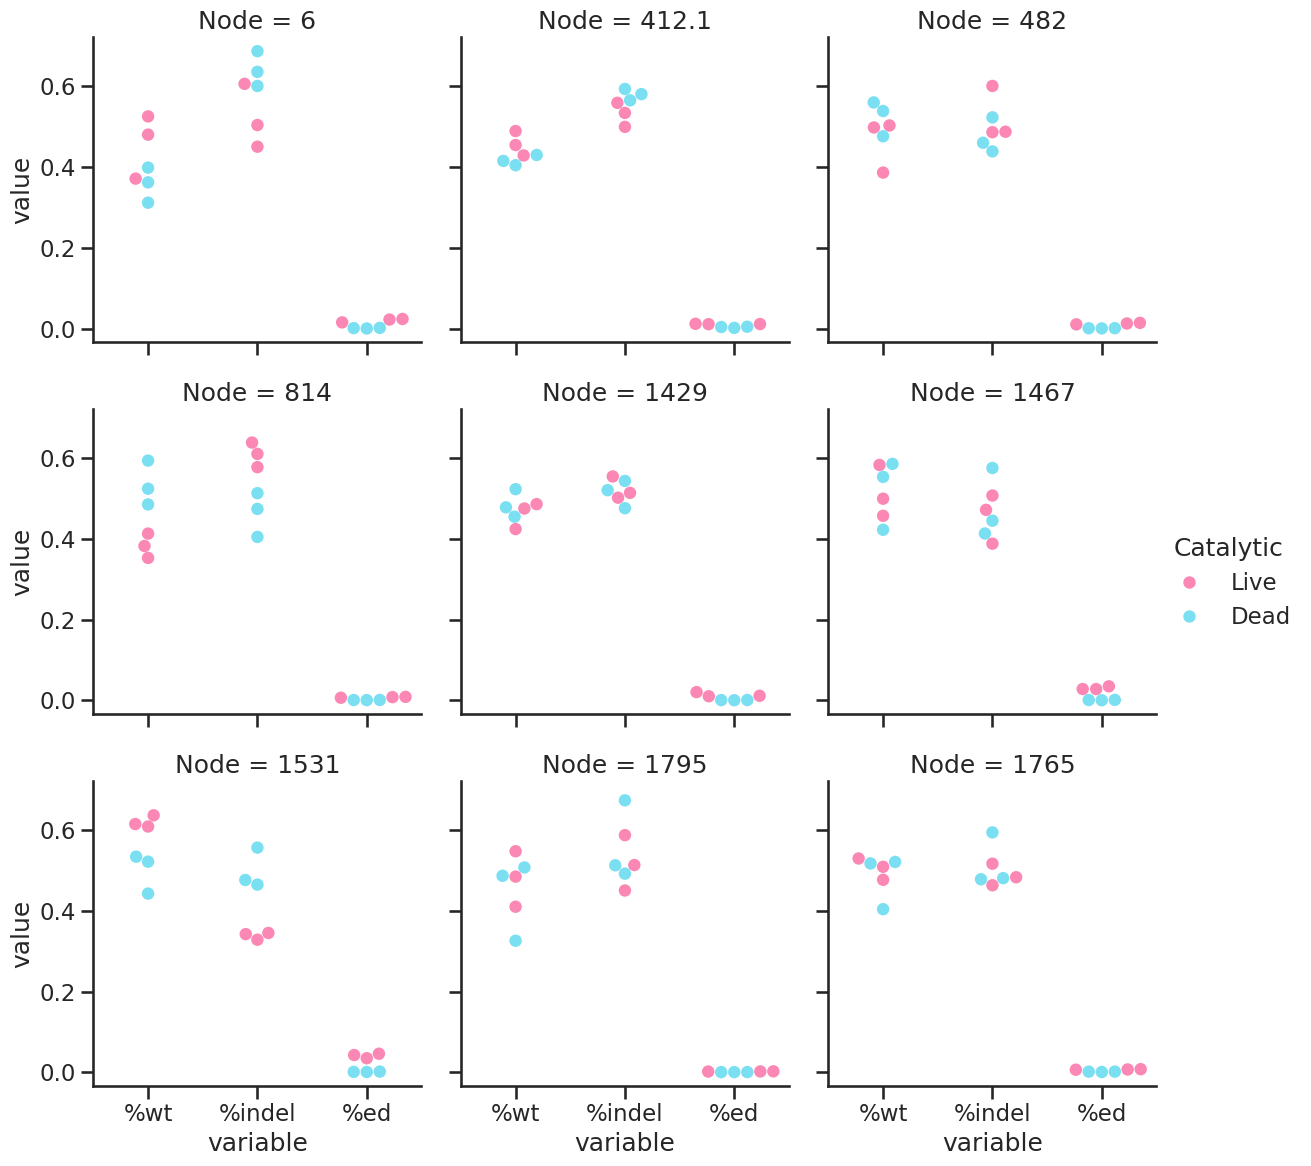

In [35]:
g = sns.catplot(data=edits_percent, 
                x="variable", 
                y="value", 
                hue='Catalytic', 
                palette=palette[:2],
                s=80,
                col="Node",
                kind="swarm", 
                sharey=True,
                col_wrap=3,
                height=4, 
                aspect=1,
)
g.savefig('files_out/fig1.png', format='png', bbox_inches='tight')

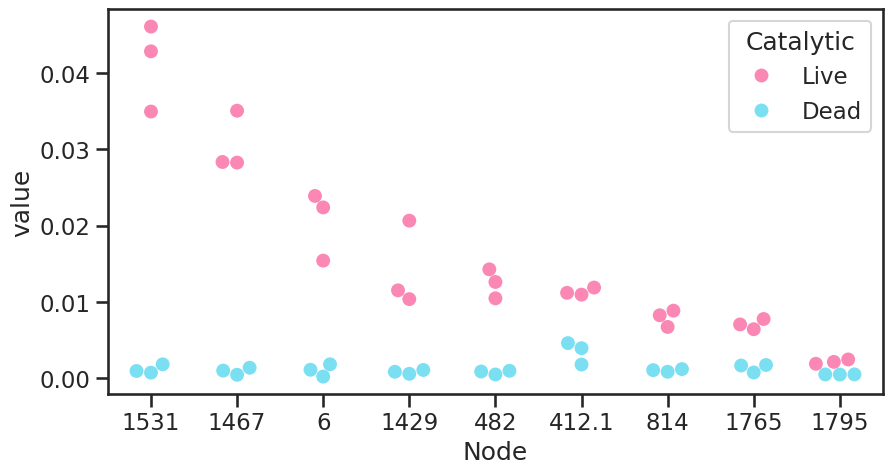

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.swarmplot(data=edits_percent[edits_percent['variable']=='%ed'].sort_values('value', ascending=False), 
              x="Node", 
              y="value", 
              hue='Catalytic', 
              palette=palette[:2],
              s=10,
)
fig.savefig('files_out/fig3.png', format='png', bbox_inches='tight')

Display fidelity:

In [38]:
editerr_out = editerr_out.merge(sample_key[['file_name', 'Node', 'Catalytic']], left_on='sample', right_on='file_name', how='left')

In [39]:
editerr_out

type  t_pos  q_pos t_idt q_idt read_outcome  \
0      swp     15     15     C     A           wt   
1      swp     15     15     C     A           wt   
2      swp     15     15     C     A           wt   
3      swp     15     15     C     A           wt   
4      swp     15     15     C     A           wt   
...    ...    ...    ...   ...   ...          ...   
71957  swp     12     12     G     A           wt   
71958  del      4      4     G     d           wt   
71959  ins      3      3     i     A           wt   
71960  ins      3      4     i     G           wt   
71961  swp     16     16     C     A           wt   

                                     read_name qual            sample  \
0      VH01686:37:AAF7YN3M5:1:1102:44589:10580   34  msMRM_12_01_rep1   
1      VH01686:37:AAF7YN3M5:1:1101:75076:19326   34  msMRM_12_01_rep1   
2      VH01686:37:AAF7YN3M5:1:1203:26601:55827   34  msMRM_12_01_rep1   
3      VH01686:37:AAF7YN3M5:1:2101:10468:19970   34  msMRM_12_01_rep1   
4      VH01686:37:AAF7YN3M5:1:2203:28248:37330   34  msMRM_12_01_rep1   
...                                        ...  ...               ...   
71957  VH01686:37:AAF7YN3M5:1:2404:61082:49295   34  msMRM_12_22_rep3   
71958  VH01686:37:AAF7YN3M5:1:2404:46388:49598   34  msMRM_12_22_rep3   
71959  VH01686:37:AAF7YN3M5:1:2404:62237:55145   34  msMRM_12_22_rep3   
71960  VH01686:37:AAF7YN3M5:1:2404:62237:55145   34  msMRM_12_22_rep3   
71961  VH01686:37:AAF7YN3M5:1:2404:65419:55978   34  msMRM_12_22_rep3   

              file_name  Node Catalytic  
0      msMRM_12_01_rep1     6      Live  
1      msMRM_12_01_rep1     6      Live  
2      msMRM_12_01_rep1     6      Live  
3      msMRM_12_01_rep1     6      Live  
4      msMRM_12_01_rep1     6      Live  
...                 ...   ...       ...  
71957  msMRM_12_22_rep3  1795      Dead  
71958  msMRM_12_22_rep3  1795      Dead  
71959  msMRM_12_22_rep3  1795      Dead  
71960  msMRM_12_22_rep3  1795      Dead  
71961  msMRM_12_22_rep3  1795      Dead  

[71962 rows x 12 columns]

In [40]:
editerr_counts = editerr_out.groupby(['sample', 'Node', 'Catalytic', 'read_outcome', 'type']).size().reset_index()\
.rename(columns={0: 'variant_counts'})
editerr_counts

sample  Node Catalytic read_outcome type  variant_counts
0    msMRM_12_01_rep1     6      Live           ed  del              10
1    msMRM_12_01_rep1     6      Live           ed  ins              63
2    msMRM_12_01_rep1     6      Live           ed  swp             297
3    msMRM_12_01_rep1     6      Live           wt  del              72
4    msMRM_12_01_rep1     6      Live           wt  ins             186
..                ...   ...       ...          ...  ...             ...
263  msMRM_12_22_rep2  1795      Dead           wt  swp             406
264  msMRM_12_22_rep3  1795      Dead           ed  swp               3
265  msMRM_12_22_rep3  1795      Dead           wt  del             124
266  msMRM_12_22_rep3  1795      Dead           wt  ins             824
267  msMRM_12_22_rep3  1795      Dead           wt  swp             847

[268 rows x 6 columns]

In [41]:
seqlen = sample_key[['file_name', 'wt_seq',  'edit_seq']]
seqlen['wt'] = seqlen['wt_seq'].apply(lambda x: len(x)-4)
seqlen['ed'] = seqlen['edit_seq'].apply(lambda x: len(x))
seqlen = seqlen.melt(id_vars='file_name', value_vars=['wt', 'ed']).rename(columns={'variable': 'read_outcome', 'value': 'len'})
seqlen

file_name read_outcome  len
0    msMRM_12_01_rep1           wt   16
1    msMRM_12_01_rep2           wt   16
2    msMRM_12_01_rep3           wt   16
3    msMRM_12_02_rep1           wt   16
4    msMRM_12_02_rep2           wt   16
..                ...          ...  ...
103  msMRM_12_21_rep2           ed   30
104  msMRM_12_21_rep3           ed   30
105  msMRM_12_22_rep1           ed   30
106  msMRM_12_22_rep2           ed   30
107  msMRM_12_22_rep3           ed   30

[108 rows x 3 columns]

In [42]:
editerr_counts = editerr_counts.merge(seqlen, left_on=['sample', 'read_outcome'], right_on=['file_name', 'read_outcome'])
editerr_counts

sample  Node Catalytic read_outcome type  variant_counts  \
0    msMRM_12_01_rep1     6      Live           ed  del              10   
1    msMRM_12_01_rep1     6      Live           ed  ins              63   
2    msMRM_12_01_rep1     6      Live           ed  swp             297   
3    msMRM_12_01_rep1     6      Live           wt  del              72   
4    msMRM_12_01_rep1     6      Live           wt  ins             186   
..                ...   ...       ...          ...  ...             ...   
263  msMRM_12_22_rep2  1795      Dead           wt  swp             406   
264  msMRM_12_22_rep3  1795      Dead           ed  swp               3   
265  msMRM_12_22_rep3  1795      Dead           wt  del             124   
266  msMRM_12_22_rep3  1795      Dead           wt  ins             824   
267  msMRM_12_22_rep3  1795      Dead           wt  swp             847   

            file_name  len  
0    msMRM_12_01_rep1   30  
1    msMRM_12_01_rep1   30  
2    msMRM_12_01_rep1   30  
3    msMRM_12_01_rep1   16  
4    msMRM_12_01_rep1   16  
..                ...  ...  
263  msMRM_12_22_rep2   16  
264  msMRM_12_22_rep3   30  
265  msMRM_12_22_rep3   16  
266  msMRM_12_22_rep3   16  
267  msMRM_12_22_rep3   16  

[268 rows x 8 columns]

In [43]:
editerr_norm = edits_out[['file_name','Node', 'Catalytic', 'wt', 'ed']]\
.melt(id_vars=['file_name', 'Node', "Catalytic"], value_vars=['wt', 'ed'])\
.rename(columns={'variable': 'read_outcome', 'value': 'read_counts'})
editerr_norm

file_name   Node Catalytic read_outcome  read_counts
0    msMRM_12_01_rep1      6      Live           wt       151018
1    msMRM_12_01_rep2      6      Live           wt        66180
2    msMRM_12_01_rep3      6      Live           wt        85261
3    msMRM_12_02_rep1  412.1      Live           wt       152453
4    msMRM_12_02_rep2  412.1      Live           wt       115716
..                ...    ...       ...          ...          ...
103  msMRM_12_21_rep2   1765      Dead           ed          389
104  msMRM_12_21_rep3   1765      Dead           ed          346
105  msMRM_12_22_rep1   1795      Dead           ed          121
106  msMRM_12_22_rep2   1795      Dead           ed           73
107  msMRM_12_22_rep3   1795      Dead           ed          124

[108 rows x 5 columns]

In [44]:
editerr_counts = editerr_counts.merge(editerr_norm, 
                                      on=['file_name', 'Node', 'Catalytic', 'read_outcome'], 
                                      # left_on=['sample', 'Node', 'Catalytic', 'read_outcome'], 
                                      # right_on=['file_name', 'Node', 'Catalytic', 'read_outcome'], 
                                      how='left')

In [46]:
editerr_counts['counts_normalized'] = editerr_counts['variant_counts']/editerr_counts['read_counts']/editerr_counts['len']
editerr_counts

sample  Node Catalytic read_outcome type  variant_counts  \
0    msMRM_12_01_rep1     6      Live           ed  del              10   
1    msMRM_12_01_rep1     6      Live           ed  ins              63   
2    msMRM_12_01_rep1     6      Live           ed  swp             297   
3    msMRM_12_01_rep1     6      Live           wt  del              72   
4    msMRM_12_01_rep1     6      Live           wt  ins             186   
..                ...   ...       ...          ...  ...             ...   
263  msMRM_12_22_rep2  1795      Dead           wt  swp             406   
264  msMRM_12_22_rep3  1795      Dead           ed  swp               3   
265  msMRM_12_22_rep3  1795      Dead           wt  del             124   
266  msMRM_12_22_rep3  1795      Dead           wt  ins             824   
267  msMRM_12_22_rep3  1795      Dead           wt  swp             847   

            file_name  len  read_counts  counts_normalized  
0    msMRM_12_01_rep1   30         6861           0.000049  
1    msMRM_12_01_rep1   30         6861           0.000306  
2    msMRM_12_01_rep1   30         6861           0.001443  
3    msMRM_12_01_rep1   16       151018           0.000030  
4    msMRM_12_01_rep1   16       151018           0.000077  
..                ...  ...          ...                ...  
263  msMRM_12_22_rep2   16        45444           0.000558  
264  msMRM_12_22_rep3   30          124           0.000806  
265  msMRM_12_22_rep3   16       114155           0.000068  
266  msMRM_12_22_rep3   16       114155           0.000451  
267  msMRM_12_22_rep3   16       114155           0.000464  

[268 rows x 10 columns]

In [47]:
editerr_counts

sample  Node Catalytic read_outcome type  variant_counts  \
0    msMRM_12_01_rep1     6      Live           ed  del              10   
1    msMRM_12_01_rep1     6      Live           ed  ins              63   
2    msMRM_12_01_rep1     6      Live           ed  swp             297   
3    msMRM_12_01_rep1     6      Live           wt  del              72   
4    msMRM_12_01_rep1     6      Live           wt  ins             186   
..                ...   ...       ...          ...  ...             ...   
263  msMRM_12_22_rep2  1795      Dead           wt  swp             406   
264  msMRM_12_22_rep3  1795      Dead           ed  swp               3   
265  msMRM_12_22_rep3  1795      Dead           wt  del             124   
266  msMRM_12_22_rep3  1795      Dead           wt  ins             824   
267  msMRM_12_22_rep3  1795      Dead           wt  swp             847   

            file_name  len  read_counts  counts_normalized  
0    msMRM_12_01_rep1   30         6861           0.000049  
1    msMRM_12_01_rep1   30         6861           0.000306  
2    msMRM_12_01_rep1   30         6861           0.001443  
3    msMRM_12_01_rep1   16       151018           0.000030  
4    msMRM_12_01_rep1   16       151018           0.000077  
..                ...  ...          ...                ...  
263  msMRM_12_22_rep2   16        45444           0.000558  
264  msMRM_12_22_rep3   30          124           0.000806  
265  msMRM_12_22_rep3   16       114155           0.000068  
266  msMRM_12_22_rep3   16       114155           0.000451  
267  msMRM_12_22_rep3   16       114155           0.000464  

[268 rows x 10 columns]

In [48]:
editerr_counts.sort_values('counts_normalized', ascending=False)

sample  Node Catalytic read_outcome type  variant_counts  \
256  msMRM_12_22_rep1  1795      Dead           ed  swp              34   
244  msMRM_12_21_rep1  1765      Dead           ed  swp              16   
65   msMRM_12_05_rep1  1429      Live           ed  swp             249   
260  msMRM_12_22_rep2  1795      Dead           ed  swp               4   
252  msMRM_12_21_rep3  1765      Dead           ed  swp              17   
..                ...   ...       ...          ...  ...             ...   
106  msMRM_12_08_rep2  1531      Live           ed  ins               3   
108  msMRM_12_08_rep2  1531      Live           wt  del              21   
114  msMRM_12_08_rep3  1531      Live           wt  del              14   
111  msMRM_12_08_rep3  1531      Live           ed  del               1   
78   msMRM_12_05_rep3  1429      Live           wt  del               5   

            file_name  len  read_counts  counts_normalized  
256  msMRM_12_22_rep1   30          121           0.009366  
244  msMRM_12_21_rep1   30          183           0.002914  
65   msMRM_12_05_rep1   30         2866           0.002896  
260  msMRM_12_22_rep2   30           73           0.001826  
252  msMRM_12_21_rep3   30          346           0.001638  
..                ...  ...          ...                ...  
106  msMRM_12_08_rep2   30         8957           0.000011  
108  msMRM_12_08_rep2   16       118444           0.000011  
114  msMRM_12_08_rep3   16        85030           0.000010  
111  msMRM_12_08_rep3   30         4664           0.000007  
78   msMRM_12_05_rep3   16        73495           0.000004  

[268 rows x 10 columns]

In [49]:
editerr_counts.to_pickle('files_out/editerr_counts.pickle', protocol=4)

In [50]:
palette = sns.color_palette(['#FB88B4', '#7BDFF2', '#F9F07A', '#9195F6'])
palette

[(0.984313725490196, 0.5333333333333333, 0.7058823529411765),
 (0.4823529411764706, 0.8745098039215686, 0.9490196078431372),
 (0.9764705882352941, 0.9411764705882353, 0.47843137254901963),
 (0.5686274509803921, 0.5843137254901961, 0.9647058823529412)]

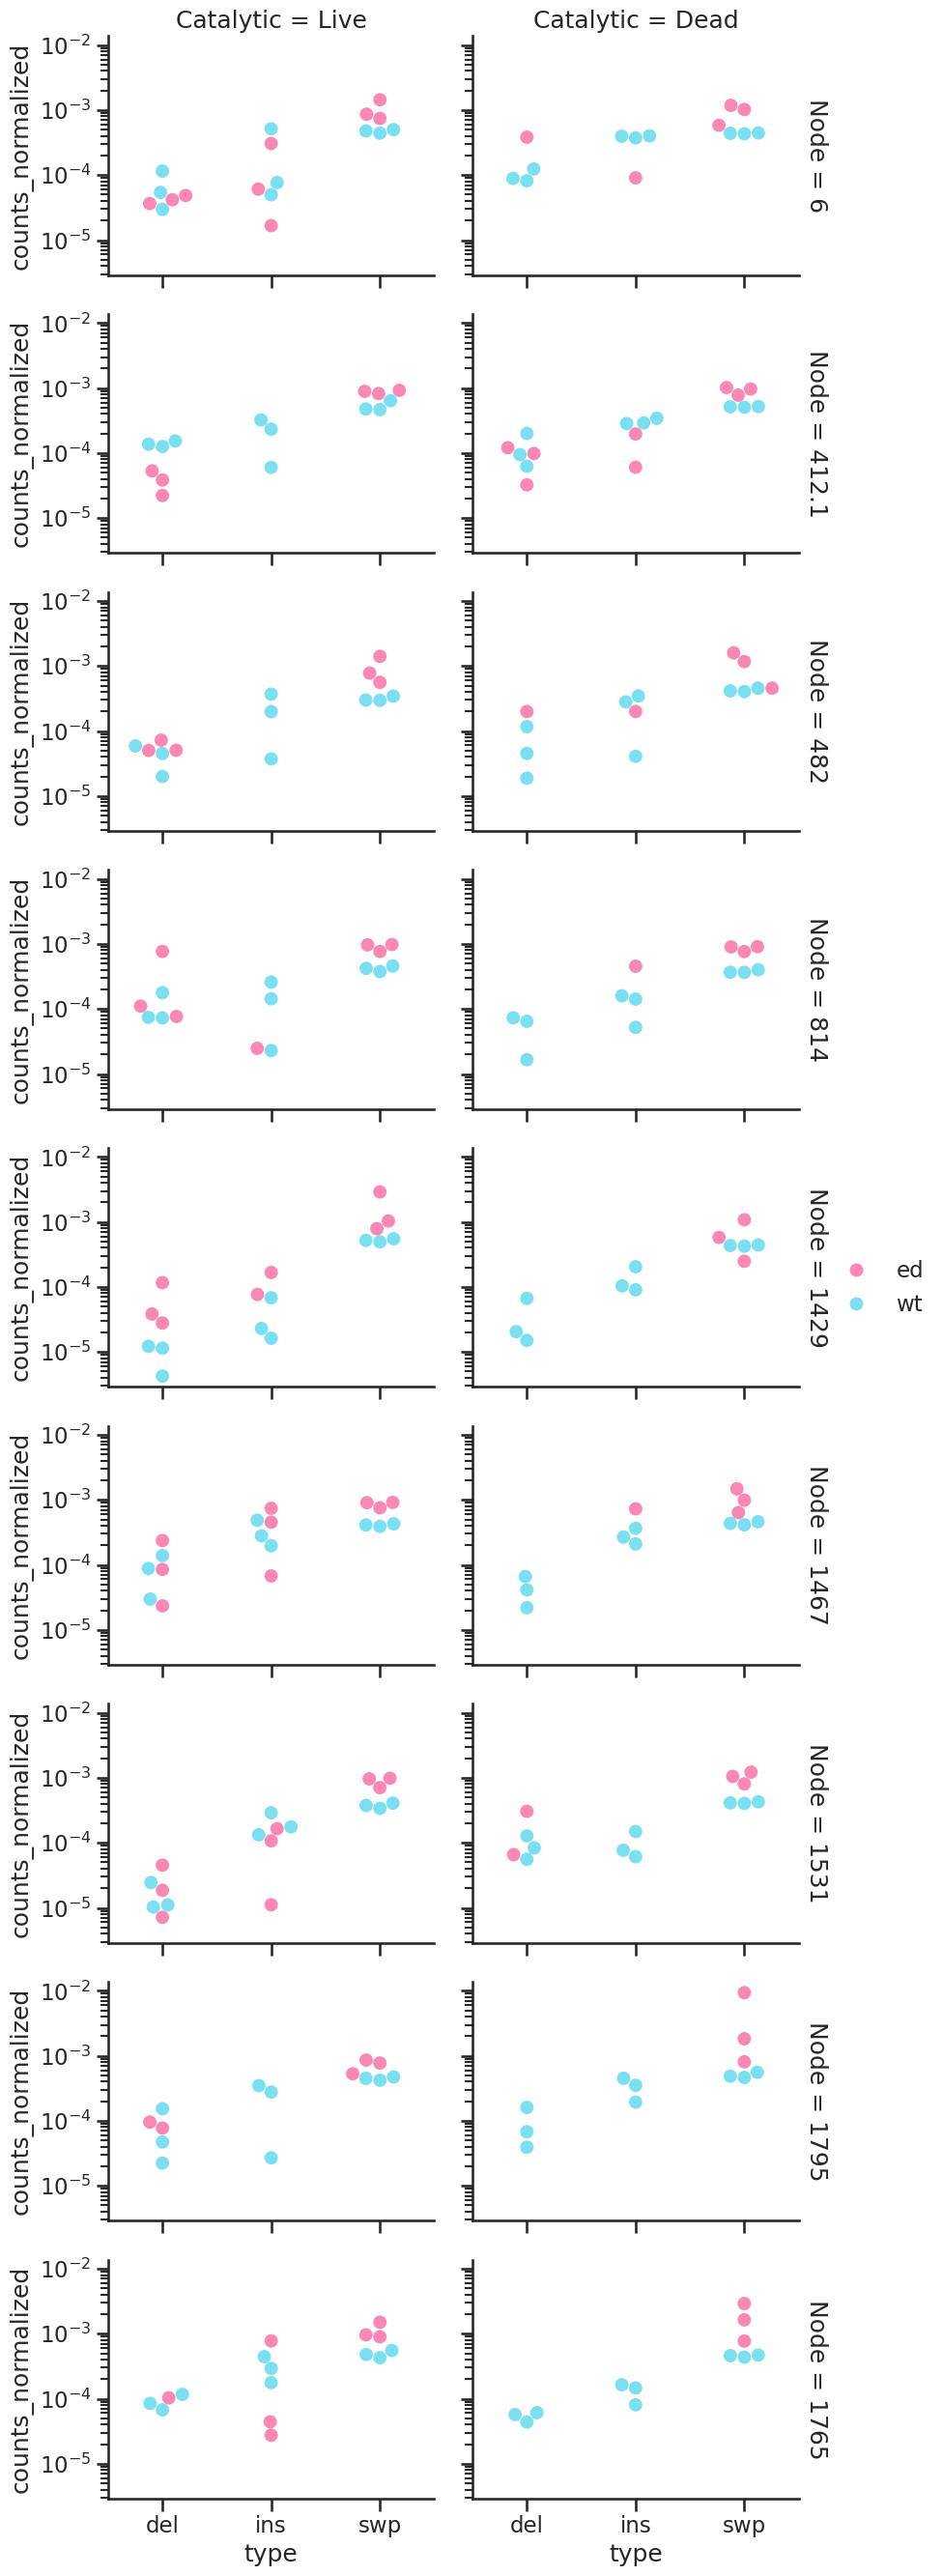

In [51]:
g = sns.FacetGrid(editerr_counts, col="Catalytic",  row="Node", margin_titles=True, aspect=1.5)
g.map_dataframe(sns.swarmplot, 
                x="type", 
                y="counts_normalized", 
                hue='read_outcome', 
                palette=palette[:2],
                s=10,
                # log_scale=True,
               )
g.set(yscale='log')
g.tight_layout()
g.add_legend()
g.savefig('files_out/fig4.png', format='png', bbox_inches='tight')

In [52]:
editerr_tpos = editerr_out.groupby(['sample', 'Node', 'Catalytic', 'read_outcome', 'type', 't_pos']).size()\
.reset_index()\
.sort_values(['t_pos', 'type', 'sample']).rename(columns={0: 'variant_counts'})

In [53]:
editerr_tpos = editerr_tpos.merge(seqlen, left_on=['sample', 'read_outcome'], right_on=['file_name', 'read_outcome'])

In [54]:
fill = editerr_tpos[['sample', 'Node', 'Catalytic', 'read_outcome', 'type', 'len']]
fill['len_real'] = fill.apply(lambda x: x['len']+4 if x['read_outcome']=='wt' else x['len'], axis=1)
fill['all_len'] = fill['len_real'].apply(range)
fill = fill.explode('all_len').rename(columns={'all_len': 't_pos'})
fill

sample  Node Catalytic read_outcome type  len  len_real t_pos
0     msMRM_12_01_rep1     6      Live           wt  ins   16        20     0
0     msMRM_12_01_rep1     6      Live           wt  ins   16        20     1
0     msMRM_12_01_rep1     6      Live           wt  ins   16        20     2
0     msMRM_12_01_rep1     6      Live           wt  ins   16        20     3
0     msMRM_12_01_rep1     6      Live           wt  ins   16        20     4
...                ...   ...       ...          ...  ...  ...       ...   ...
2029  msMRM_12_16_rep3  1429      Dead           ed  swp   30        30    25
2029  msMRM_12_16_rep3  1429      Dead           ed  swp   30        30    26
2029  msMRM_12_16_rep3  1429      Dead           ed  swp   30        30    27
2029  msMRM_12_16_rep3  1429      Dead           ed  swp   30        30    28
2029  msMRM_12_16_rep3  1429      Dead           ed  swp   30        30    29

[48110 rows x 8 columns]

In [56]:
editerr_tpos = fill.merge(editerr_tpos, on=['sample', 'Node', 'Catalytic', 'read_outcome', 'type', 't_pos', 'len'], how='left')\
.fillna({'variant_counts': 0.0})\
.astype({'variant_counts': int})

In [58]:
editerr_tpos = editerr_tpos.merge(editerr_norm, 
                                  left_on=['sample', 'Node', 'Catalytic', 'read_outcome'], 
                                  right_on=['file_name', 'Node', 'Catalytic', 'read_outcome'], 
                                  how='left')

In [59]:
drop_idx = editerr_tpos[(editerr_tpos['read_outcome']=='wt')&(editerr_tpos['t_pos']>=5)&(editerr_tpos['t_pos']<=8)].index
drop_idx

Index([    5,     6,     7,     8,    25,    26,    27,    28,    45,    46,
       ...
       30027, 30028, 30045, 30046, 30047, 30048, 30065, 30066, 30067, 30068],
      dtype='int64', length=5116)

In [60]:
editerr_tpos.drop(index=drop_idx, inplace=True)

In [61]:
# remove visual gap in t_pos for wt sequences
editerr_tpos['t_pos'] = editerr_tpos.apply(lambda x: x['t_pos']-4 if (x['read_outcome']=='wt')&(x['t_pos']>=9) else x['t_pos'], axis=1)

In [63]:
editerr_tpos['group'] = editerr_tpos['read_outcome'] + '_' + editerr_tpos['type']
editerr_tpos['count_normalized'] = editerr_tpos['variant_counts'] / editerr_tpos['read_counts']
editerr_tpos['tpos_normalized'] = editerr_tpos['t_pos'] / editerr_tpos['len']

In [64]:
editerr_tpos.replace({'count_normalized':{0:0.000001}}, inplace=True)

In [65]:
editerr_tpos

sample  Node Catalytic read_outcome type  len  len_real  \
0      msMRM_12_01_rep1     6      Live           wt  ins   16        20   
1      msMRM_12_01_rep1     6      Live           wt  ins   16        20   
2      msMRM_12_01_rep1     6      Live           wt  ins   16        20   
3      msMRM_12_01_rep1     6      Live           wt  ins   16        20   
4      msMRM_12_01_rep1     6      Live           wt  ins   16        20   
...                 ...   ...       ...          ...  ...  ...       ...   
48105  msMRM_12_16_rep3  1429      Dead           ed  swp   30        30   
48106  msMRM_12_16_rep3  1429      Dead           ed  swp   30        30   
48107  msMRM_12_16_rep3  1429      Dead           ed  swp   30        30   
48108  msMRM_12_16_rep3  1429      Dead           ed  swp   30        30   
48109  msMRM_12_16_rep3  1429      Dead           ed  swp   30        30   

       t_pos  variant_counts       file_name_x       file_name_y  read_counts  \
0          0             158  msMRM_12_01_rep1  msMRM_12_01_rep1       151018   
1          1               0               NaN  msMRM_12_01_rep1       151018   
2          2              20  msMRM_12_01_rep1  msMRM_12_01_rep1       151018   
3          3               0               NaN  msMRM_12_01_rep1       151018   
4          4               8  msMRM_12_01_rep1  msMRM_12_01_rep1       151018   
...      ...             ...               ...               ...          ...   
48105     25               0               NaN  msMRM_12_16_rep3          134   
48106     26               0               NaN  msMRM_12_16_rep3          134   
48107     27               1  msMRM_12_16_rep3  msMRM_12_16_rep3          134   
48108     28               0               NaN  msMRM_12_16_rep3          134   
48109     29               0               NaN  msMRM_12_16_rep3          134   

        group  count_normalized  tpos_normalized  
0      wt_ins          0.001046         0.000000  
1      wt_ins          0.000001         0.062500  
2      wt_ins          0.000132         0.125000  
3      wt_ins          0.000001         0.187500  
4      wt_ins          0.000053         0.250000  
...       ...               ...              ...  
48105  ed_swp          0.000001         0.833333  
48106  ed_swp          0.000001         0.866667  
48107  ed_swp          0.007463         0.900000  
48108  ed_swp          0.000001         0.933333  
48109  ed_swp          0.000001         0.966667  

[42994 rows x 15 columns]

In [66]:
editerr_tpos.to_pickle('files_out/editerr_tpos.pickle', protocol=4)

In [67]:
palette = sns.color_palette(['#FB88B4', '#ffafcc', '#ffc8dd', '#9195F6', '#b8c0ff', '#dee2ff'])#, '#c8b6ff', '#e7c6ff'])
palette

[(0.984313725490196, 0.5333333333333333, 0.7058823529411765),
 (1.0, 0.6862745098039216, 0.8),
 (1.0, 0.7843137254901961, 0.8666666666666667),
 (0.5686274509803921, 0.5843137254901961, 0.9647058823529412),
 (0.7215686274509804, 0.7529411764705882, 1.0),
 (0.8705882352941177, 0.8862745098039215, 1.0)]

In [68]:
hue_order = [o+'_'+t for o in ['wt', 'ed'] for t in ['ins', 'del', 'swp'] ]

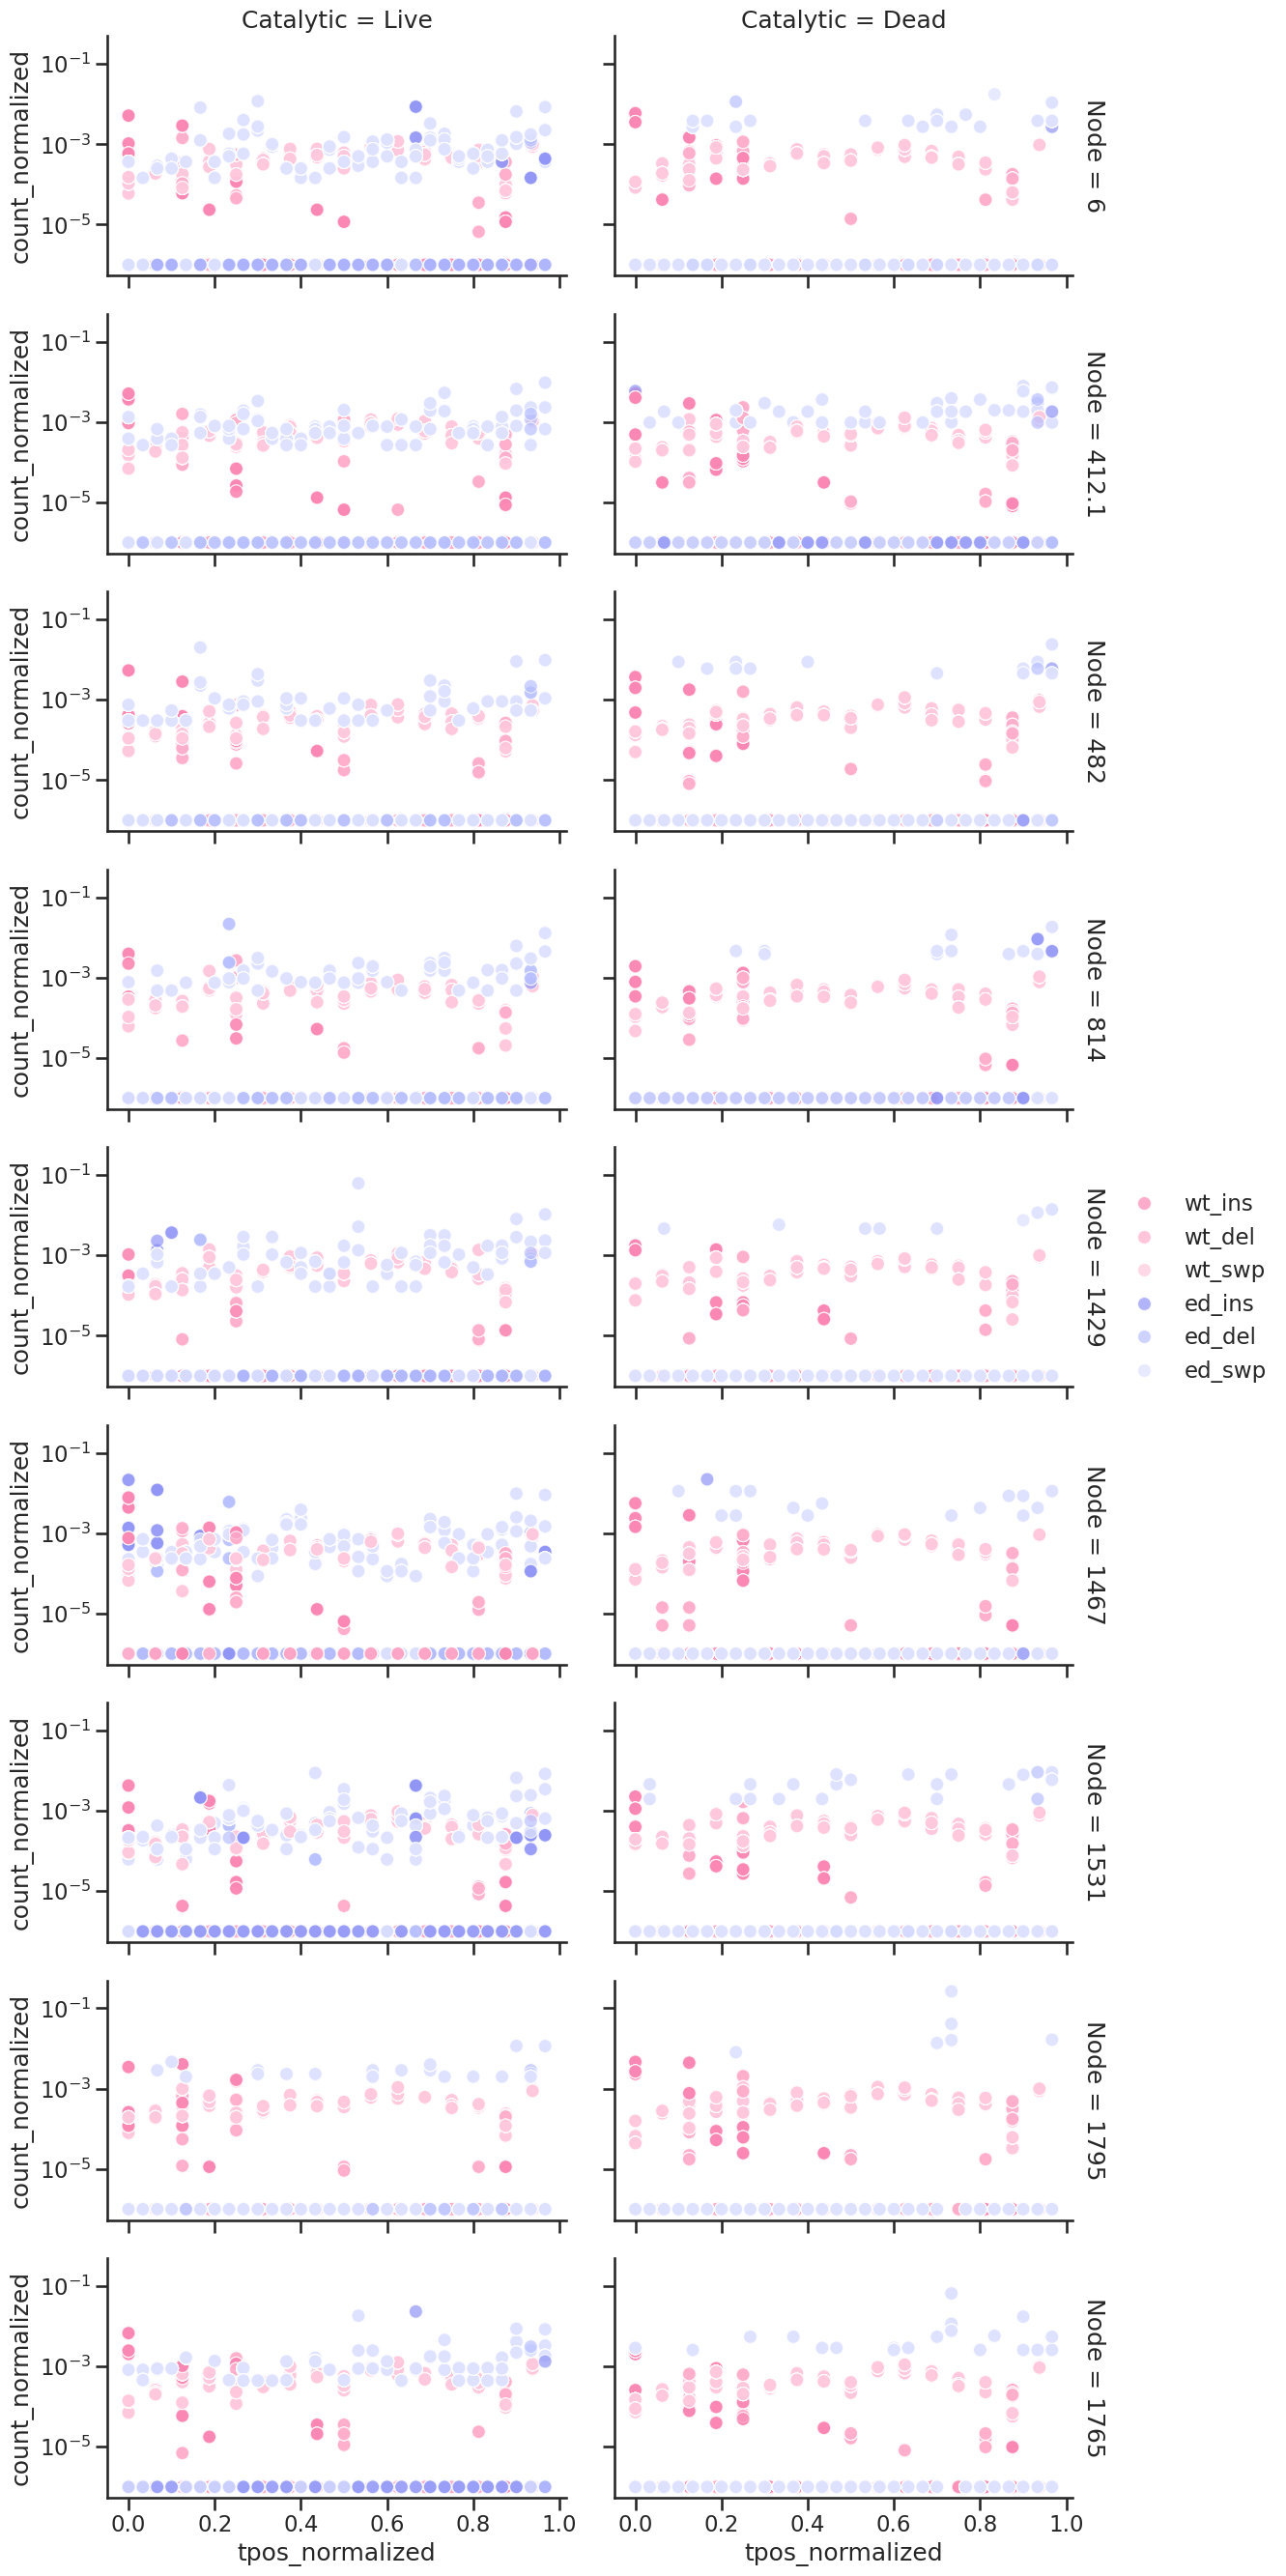

In [69]:
g = sns.FacetGrid(editerr_tpos, col="Catalytic",  row="Node", margin_titles=True, 
                  aspect=2,
                 )
g.map_dataframe(sns.scatterplot, 
                x="tpos_normalized", 
                y="count_normalized", 
                hue='group', 
                hue_order=hue_order,
                palette=palette,
                s=100,
                alpha=0.7,
               )
g.set(yscale='log')
g.tight_layout()
g.add_legend()

# g.refline(x=[7/20], c='#FB88B4', linestyle='--', alpha=0.5)
g.savefig('files_out/fig5.png', format='png', bbox_inches='tight')

In [70]:
palette = sns.color_palette(['#FB88B4', '#F9F07A', '#9195F6'])
palette

[(0.984313725490196, 0.5333333333333333, 0.7058823529411765),
 (0.9764705882352941, 0.9411764705882353, 0.47843137254901963),
 (0.5686274509803921, 0.5843137254901961, 0.9647058823529412)]

In [71]:
editerr_tpos['cat_outcome'] = editerr_tpos['Catalytic'] + '_' + editerr_tpos['read_outcome']
editerr_tpos

sample  Node Catalytic read_outcome type  len  len_real  \
0      msMRM_12_01_rep1     6      Live           wt  ins   16        20   
1      msMRM_12_01_rep1     6      Live           wt  ins   16        20   
2      msMRM_12_01_rep1     6      Live           wt  ins   16        20   
3      msMRM_12_01_rep1     6      Live           wt  ins   16        20   
4      msMRM_12_01_rep1     6      Live           wt  ins   16        20   
...                 ...   ...       ...          ...  ...  ...       ...   
48105  msMRM_12_16_rep3  1429      Dead           ed  swp   30        30   
48106  msMRM_12_16_rep3  1429      Dead           ed  swp   30        30   
48107  msMRM_12_16_rep3  1429      Dead           ed  swp   30        30   
48108  msMRM_12_16_rep3  1429      Dead           ed  swp   30        30   
48109  msMRM_12_16_rep3  1429      Dead           ed  swp   30        30   

       t_pos  variant_counts       file_name_x       file_name_y  read_counts  \
0          0             158  msMRM_12_01_rep1  msMRM_12_01_rep1       151018   
1          1               0               NaN  msMRM_12_01_rep1       151018   
2          2              20  msMRM_12_01_rep1  msMRM_12_01_rep1       151018   
3          3               0               NaN  msMRM_12_01_rep1       151018   
4          4               8  msMRM_12_01_rep1  msMRM_12_01_rep1       151018   
...      ...             ...               ...               ...          ...   
48105     25               0               NaN  msMRM_12_16_rep3          134   
48106     26               0               NaN  msMRM_12_16_rep3          134   
48107     27               1  msMRM_12_16_rep3  msMRM_12_16_rep3          134   
48108     28               0               NaN  msMRM_12_16_rep3          134   
48109     29               0               NaN  msMRM_12_16_rep3          134   

        group  count_normalized  tpos_normalized cat_outcome  
0      wt_ins          0.001046         0.000000     Live_wt  
1      wt_ins          0.000001         0.062500     Live_wt  
2      wt_ins          0.000132         0.125000     Live_wt  
3      wt_ins          0.000001         0.187500     Live_wt  
4      wt_ins          0.000053         0.250000     Live_wt  
...       ...               ...              ...         ...  
48105  ed_swp          0.000001         0.833333     Dead_ed  
48106  ed_swp          0.000001         0.866667     Dead_ed  
48107  ed_swp          0.007463         0.900000     Dead_ed  
48108  ed_swp          0.000001         0.933333     Dead_ed  
48109  ed_swp          0.000001         0.966667     Dead_ed  

[42994 rows x 16 columns]

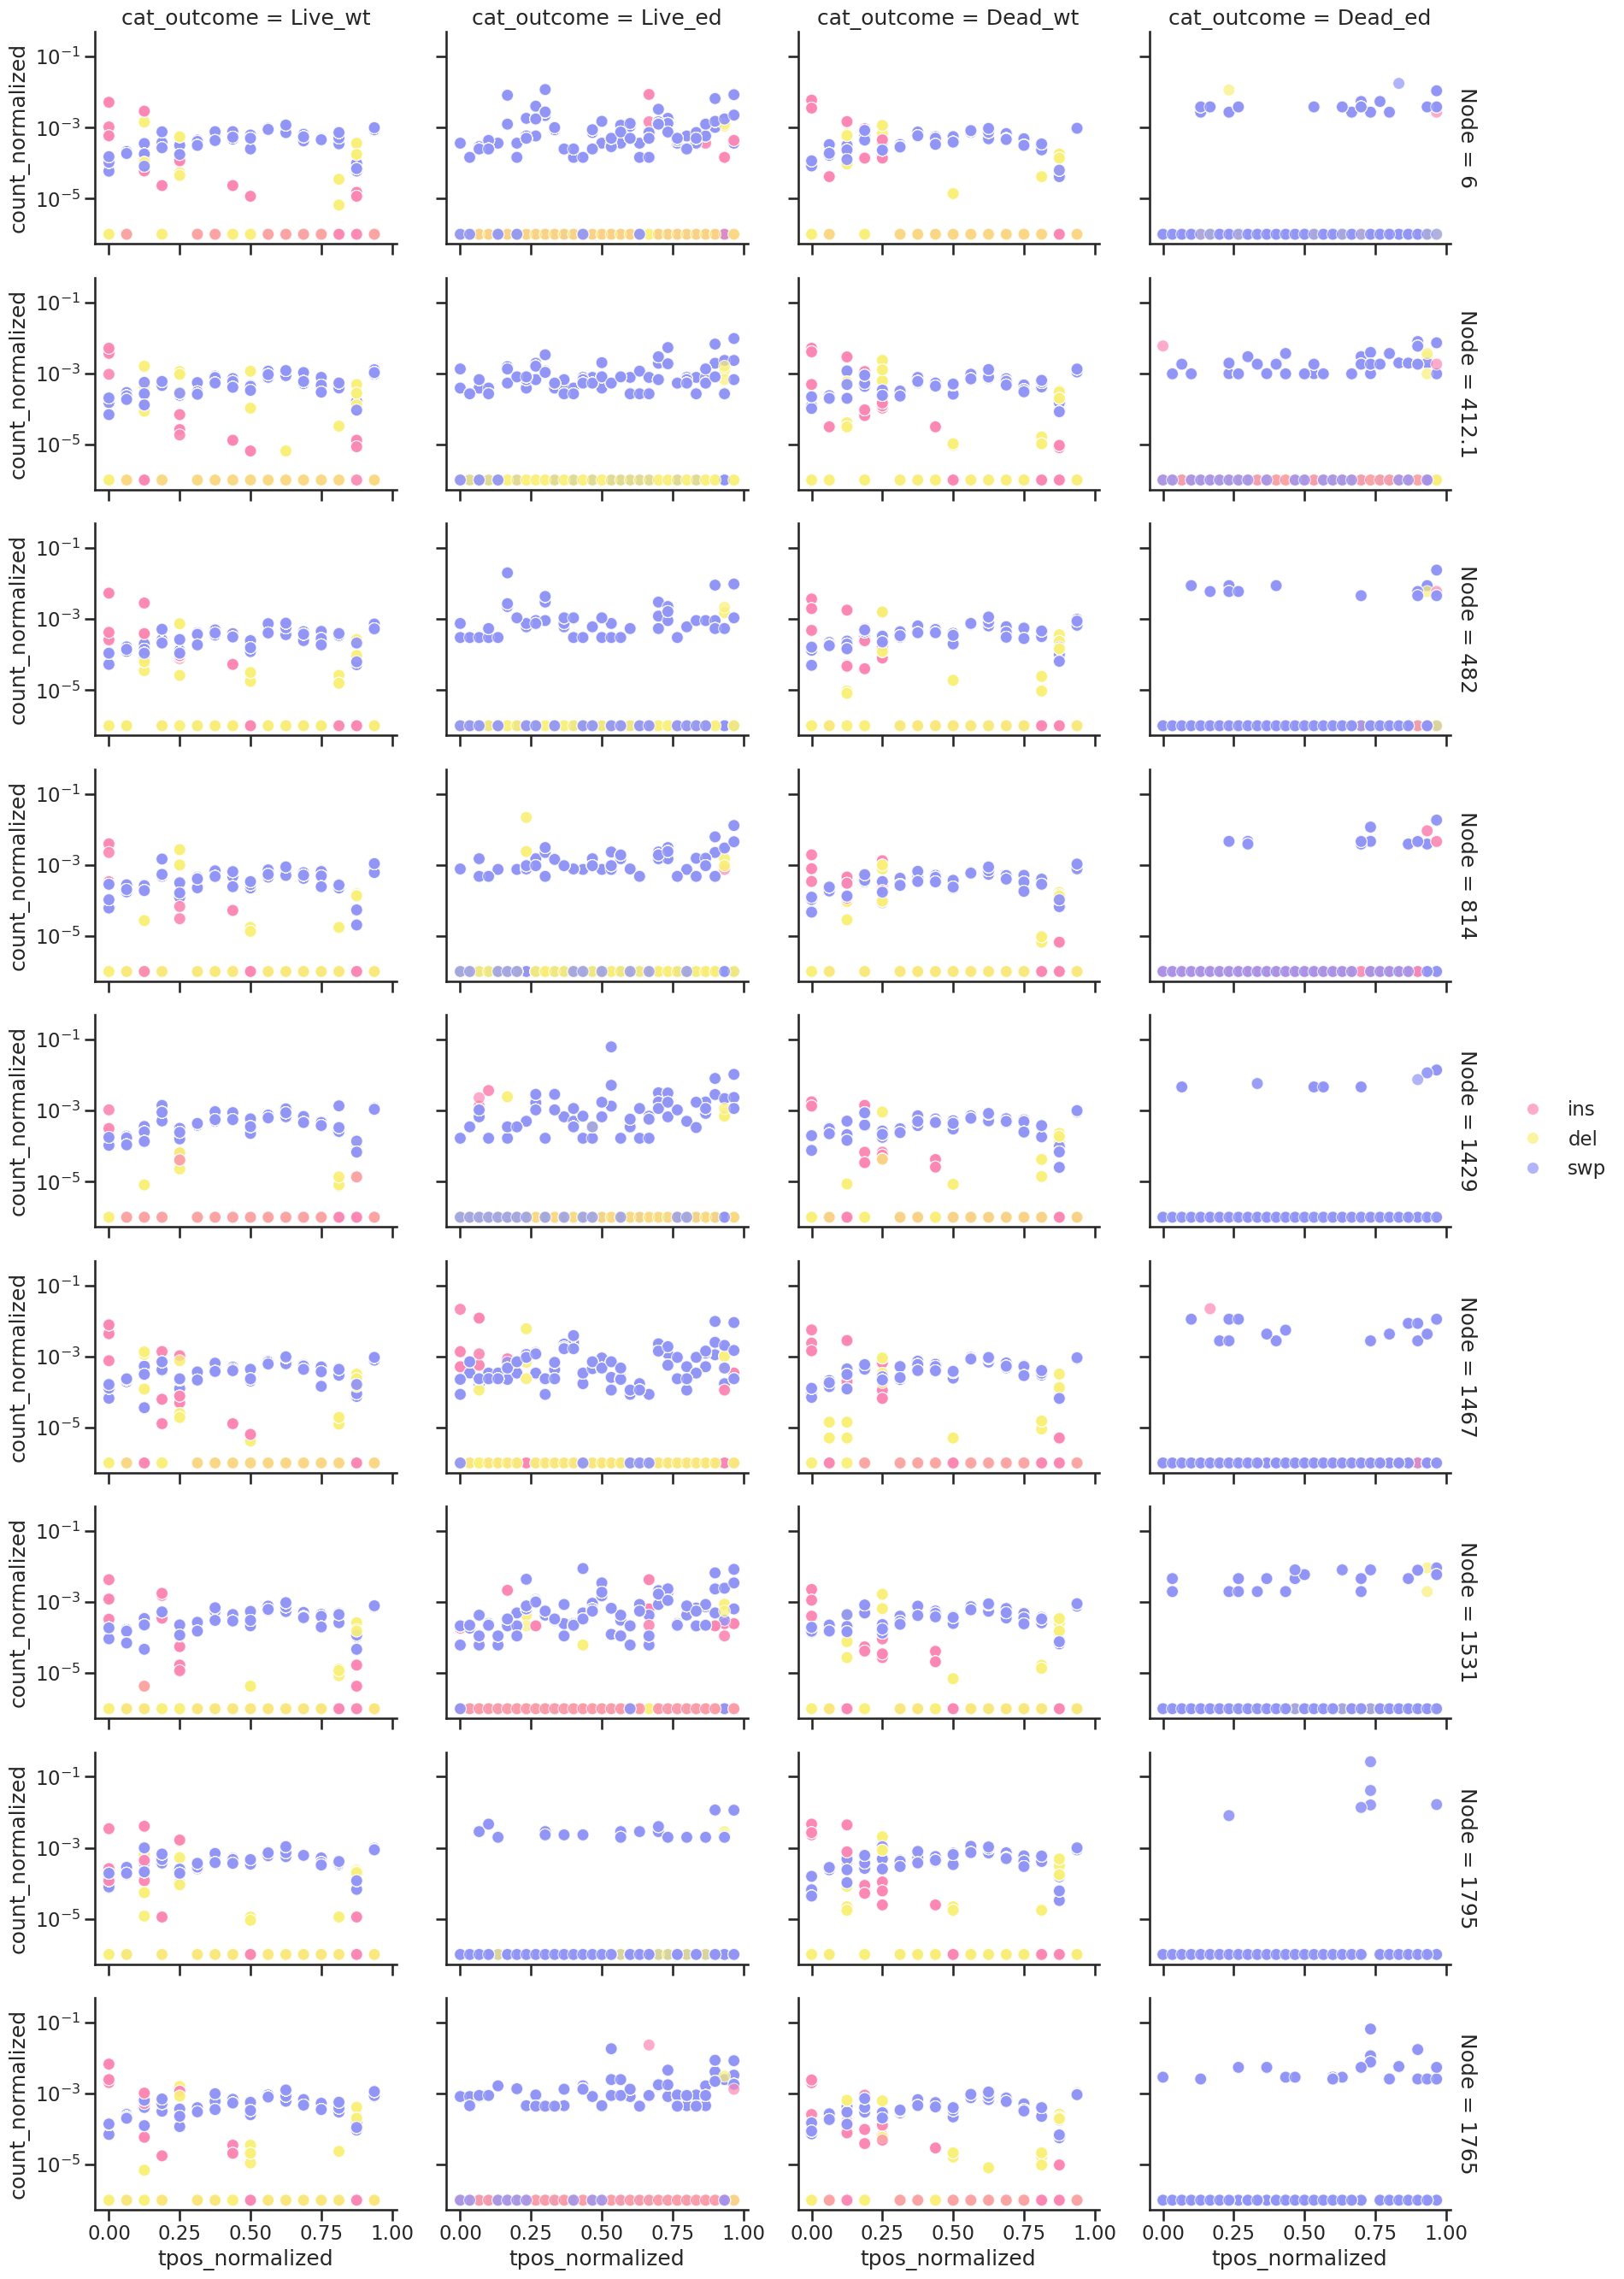

In [72]:
g = sns.FacetGrid(editerr_tpos, col="cat_outcome",  row="Node", margin_titles=True, 
                  aspect=1.5,
                 )
g.map_dataframe(sns.scatterplot, 
                x="tpos_normalized", 
                y="count_normalized", 
                hue='type', 
                hue_order=['ins', 'del', 'swp'],
                palette=palette,
                s=100,
                alpha=0.7,
               )
g.set(yscale='log')
g.tight_layout()
g.add_legend()

g.savefig('files_out/fig6.png', format='png', bbox_inches='tight')

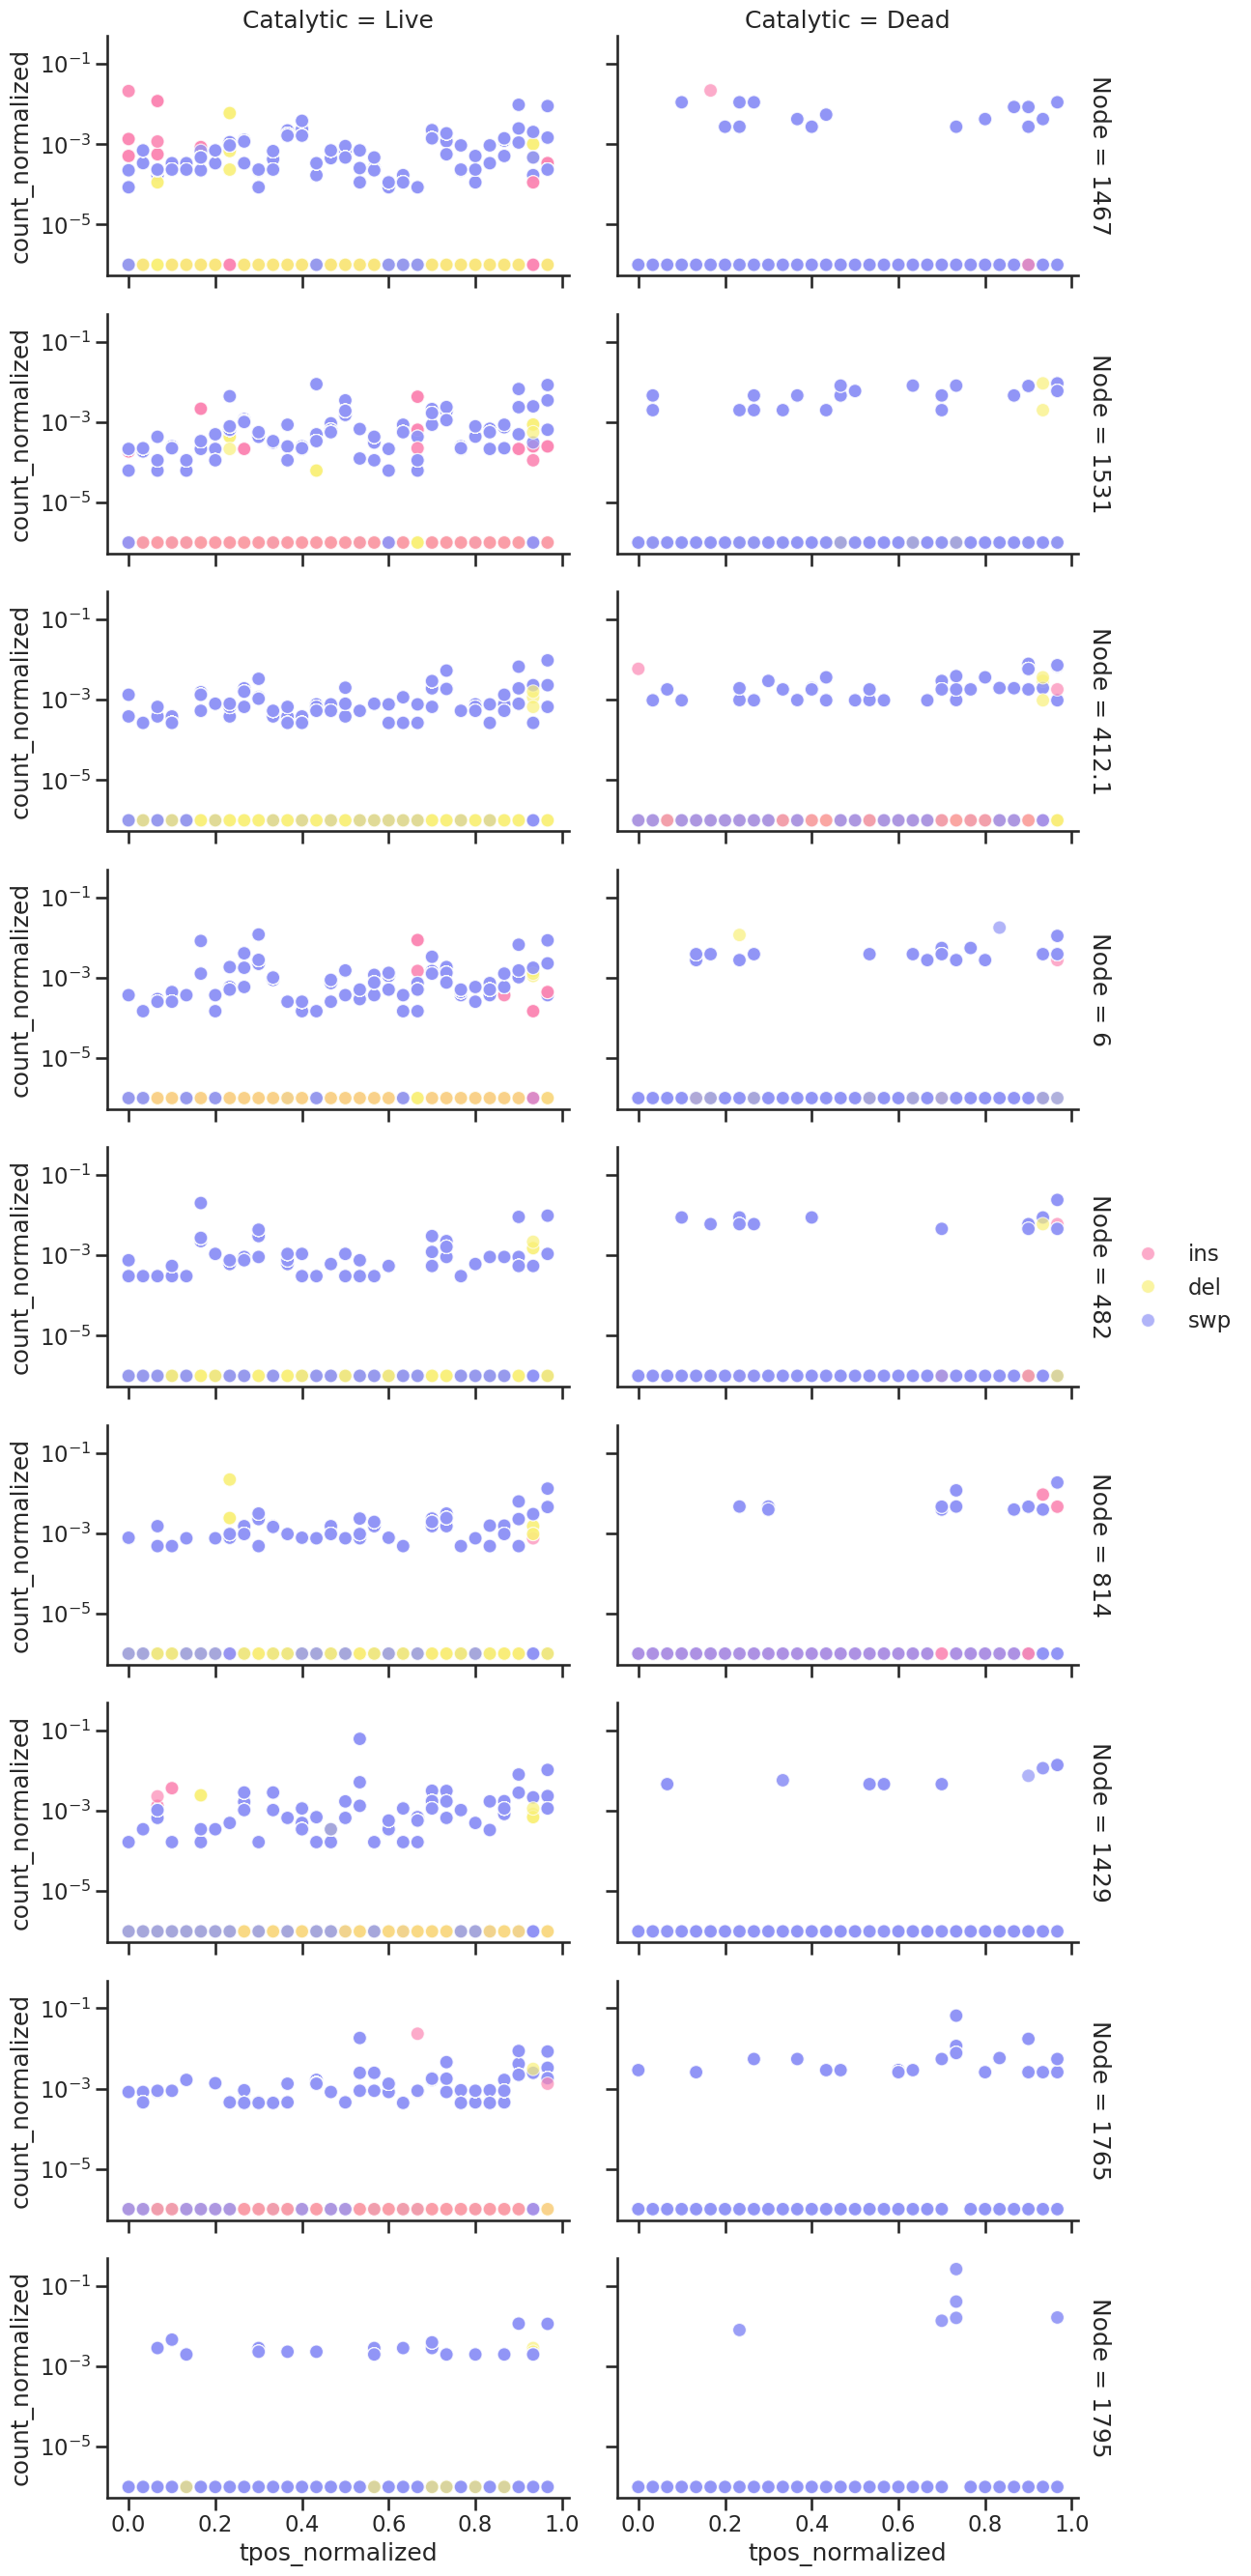

In [73]:
g = sns.FacetGrid(editerr_tpos[editerr_tpos['read_outcome']=='ed'], col="Catalytic",  row="Node", margin_titles=True, 
                  aspect=2,
                 )
g.map_dataframe(sns.scatterplot, 
                x="tpos_normalized", 
                y="count_normalized", 
                hue='type', 
                hue_order=['ins', 'del', 'swp'],
                palette=palette,
                s=100,
                alpha=0.7,
               )
g.set(yscale='log')
g.tight_layout()
g.add_legend()
g.savefig('files_out/fig7.png', format='png', bbox_inches='tight')

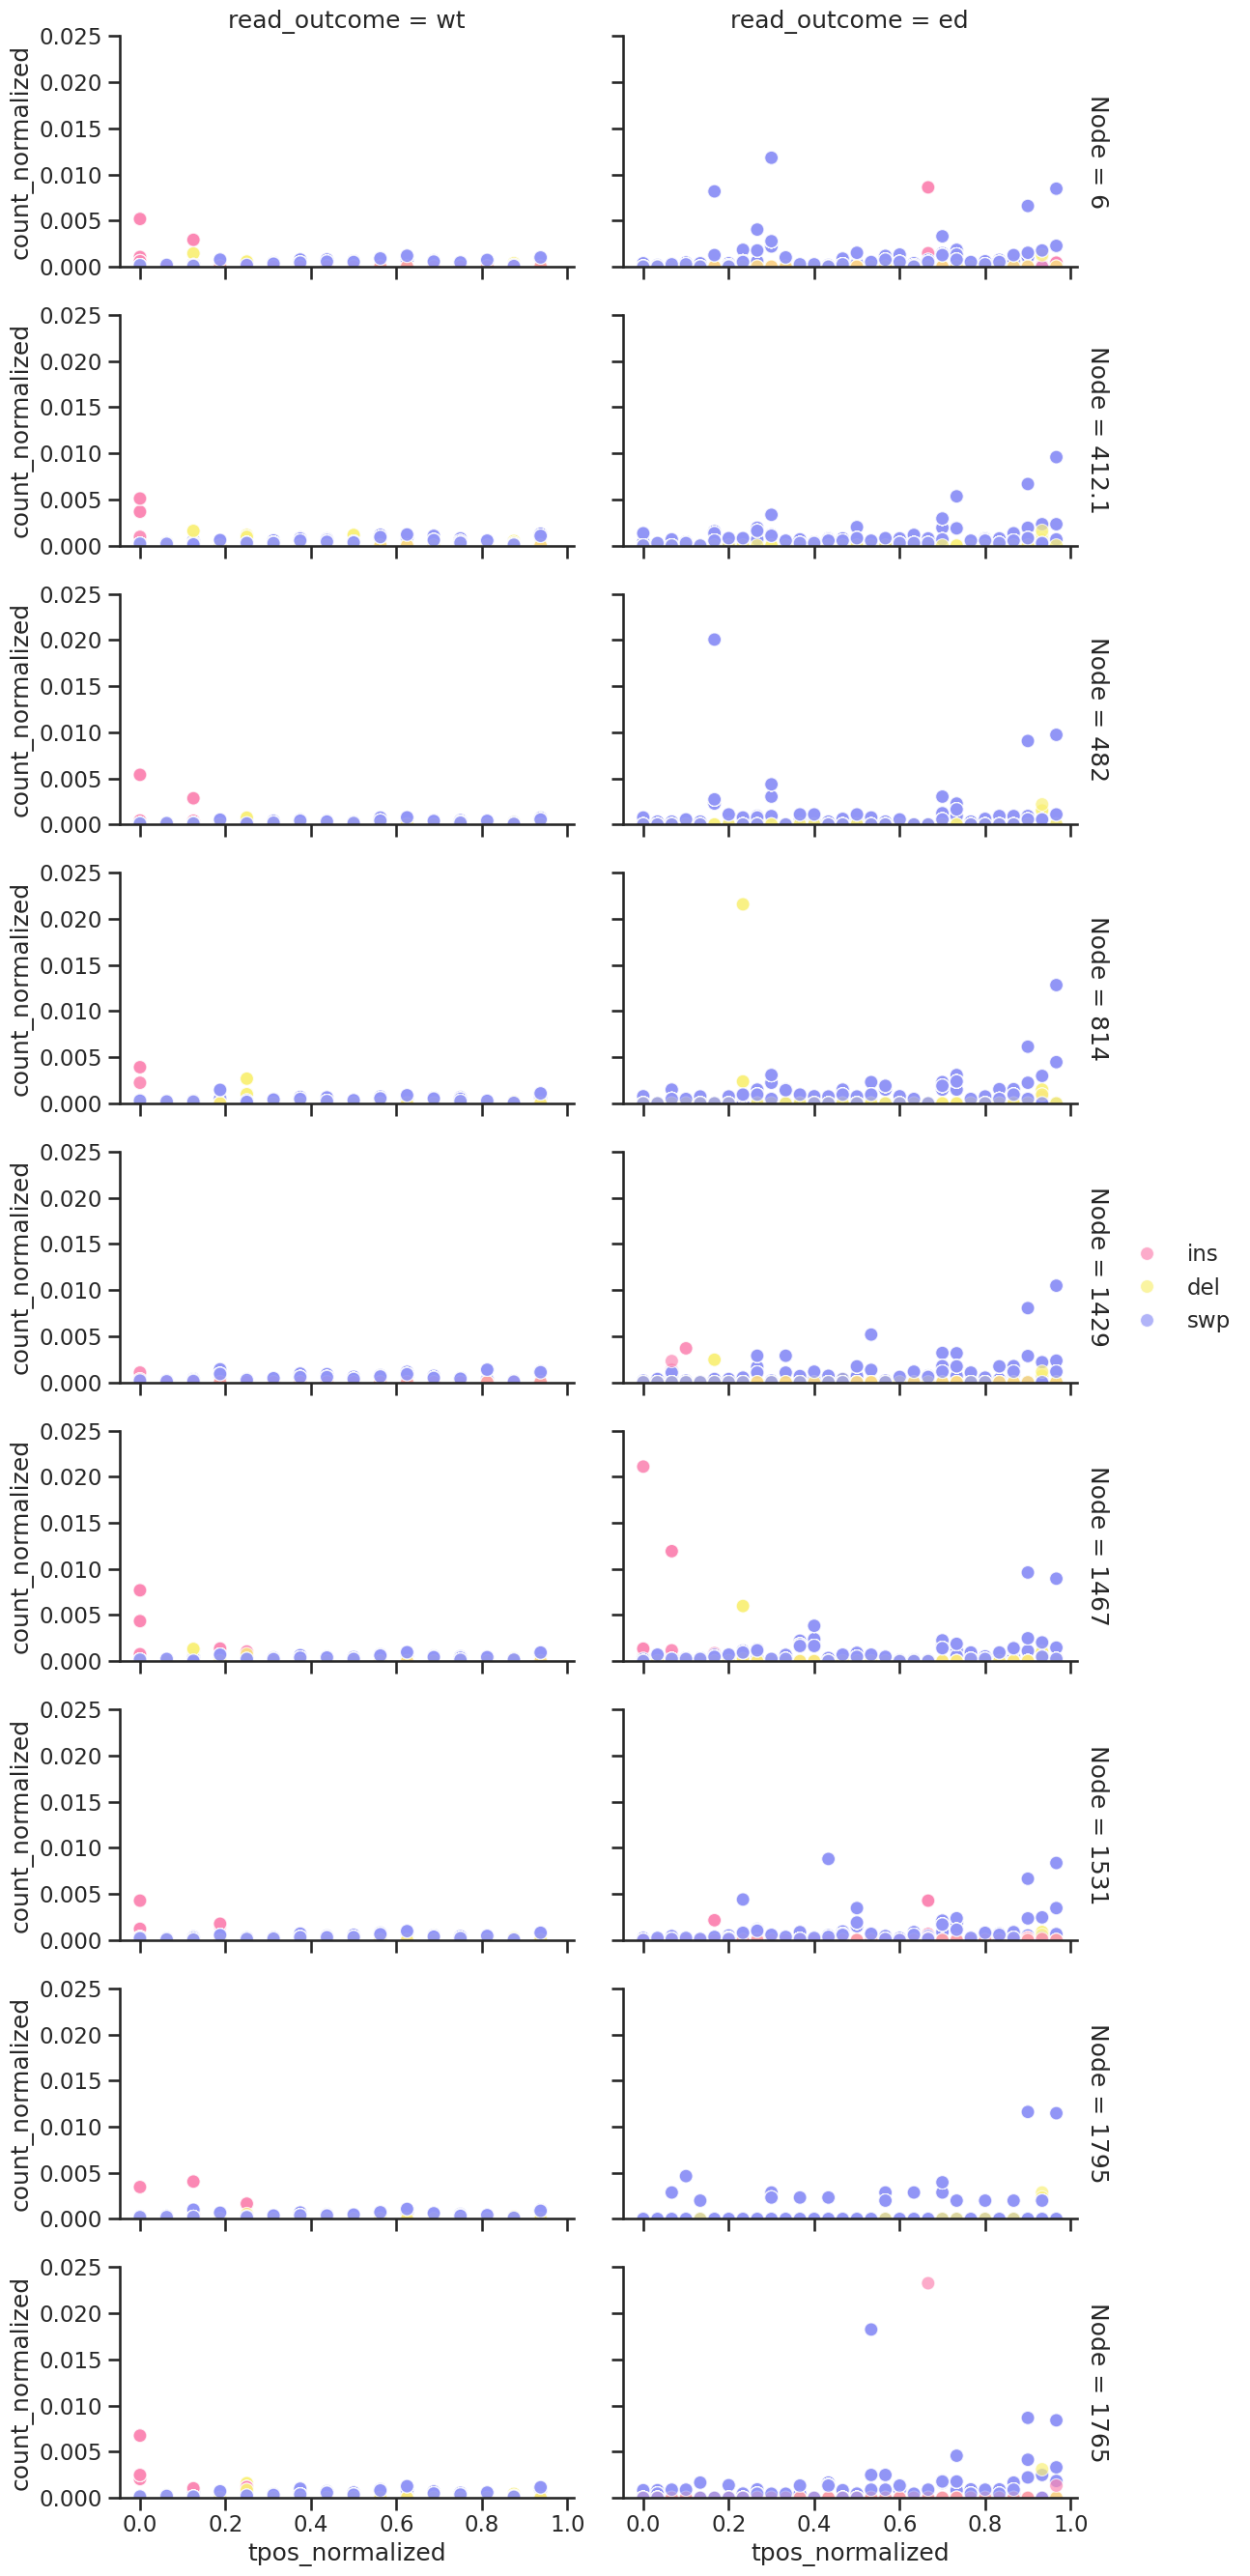

In [74]:
g = sns.FacetGrid(editerr_tpos[editerr_tpos['Catalytic']=='Live'], col="read_outcome",  row="Node", margin_titles=True, 
                  aspect=2,
                 )
g.map_dataframe(sns.scatterplot, 
                x="tpos_normalized", 
                y="count_normalized", 
                hue='type', 
                hue_order=['ins', 'del', 'swp'],
                palette=palette,
                s=100,
                alpha=0.7,
               )
g.set(ylim=[0,0.025])
g.tight_layout()
g.add_legend()
g.savefig('files_out/fig8.png', format='png', bbox_inches='tight')

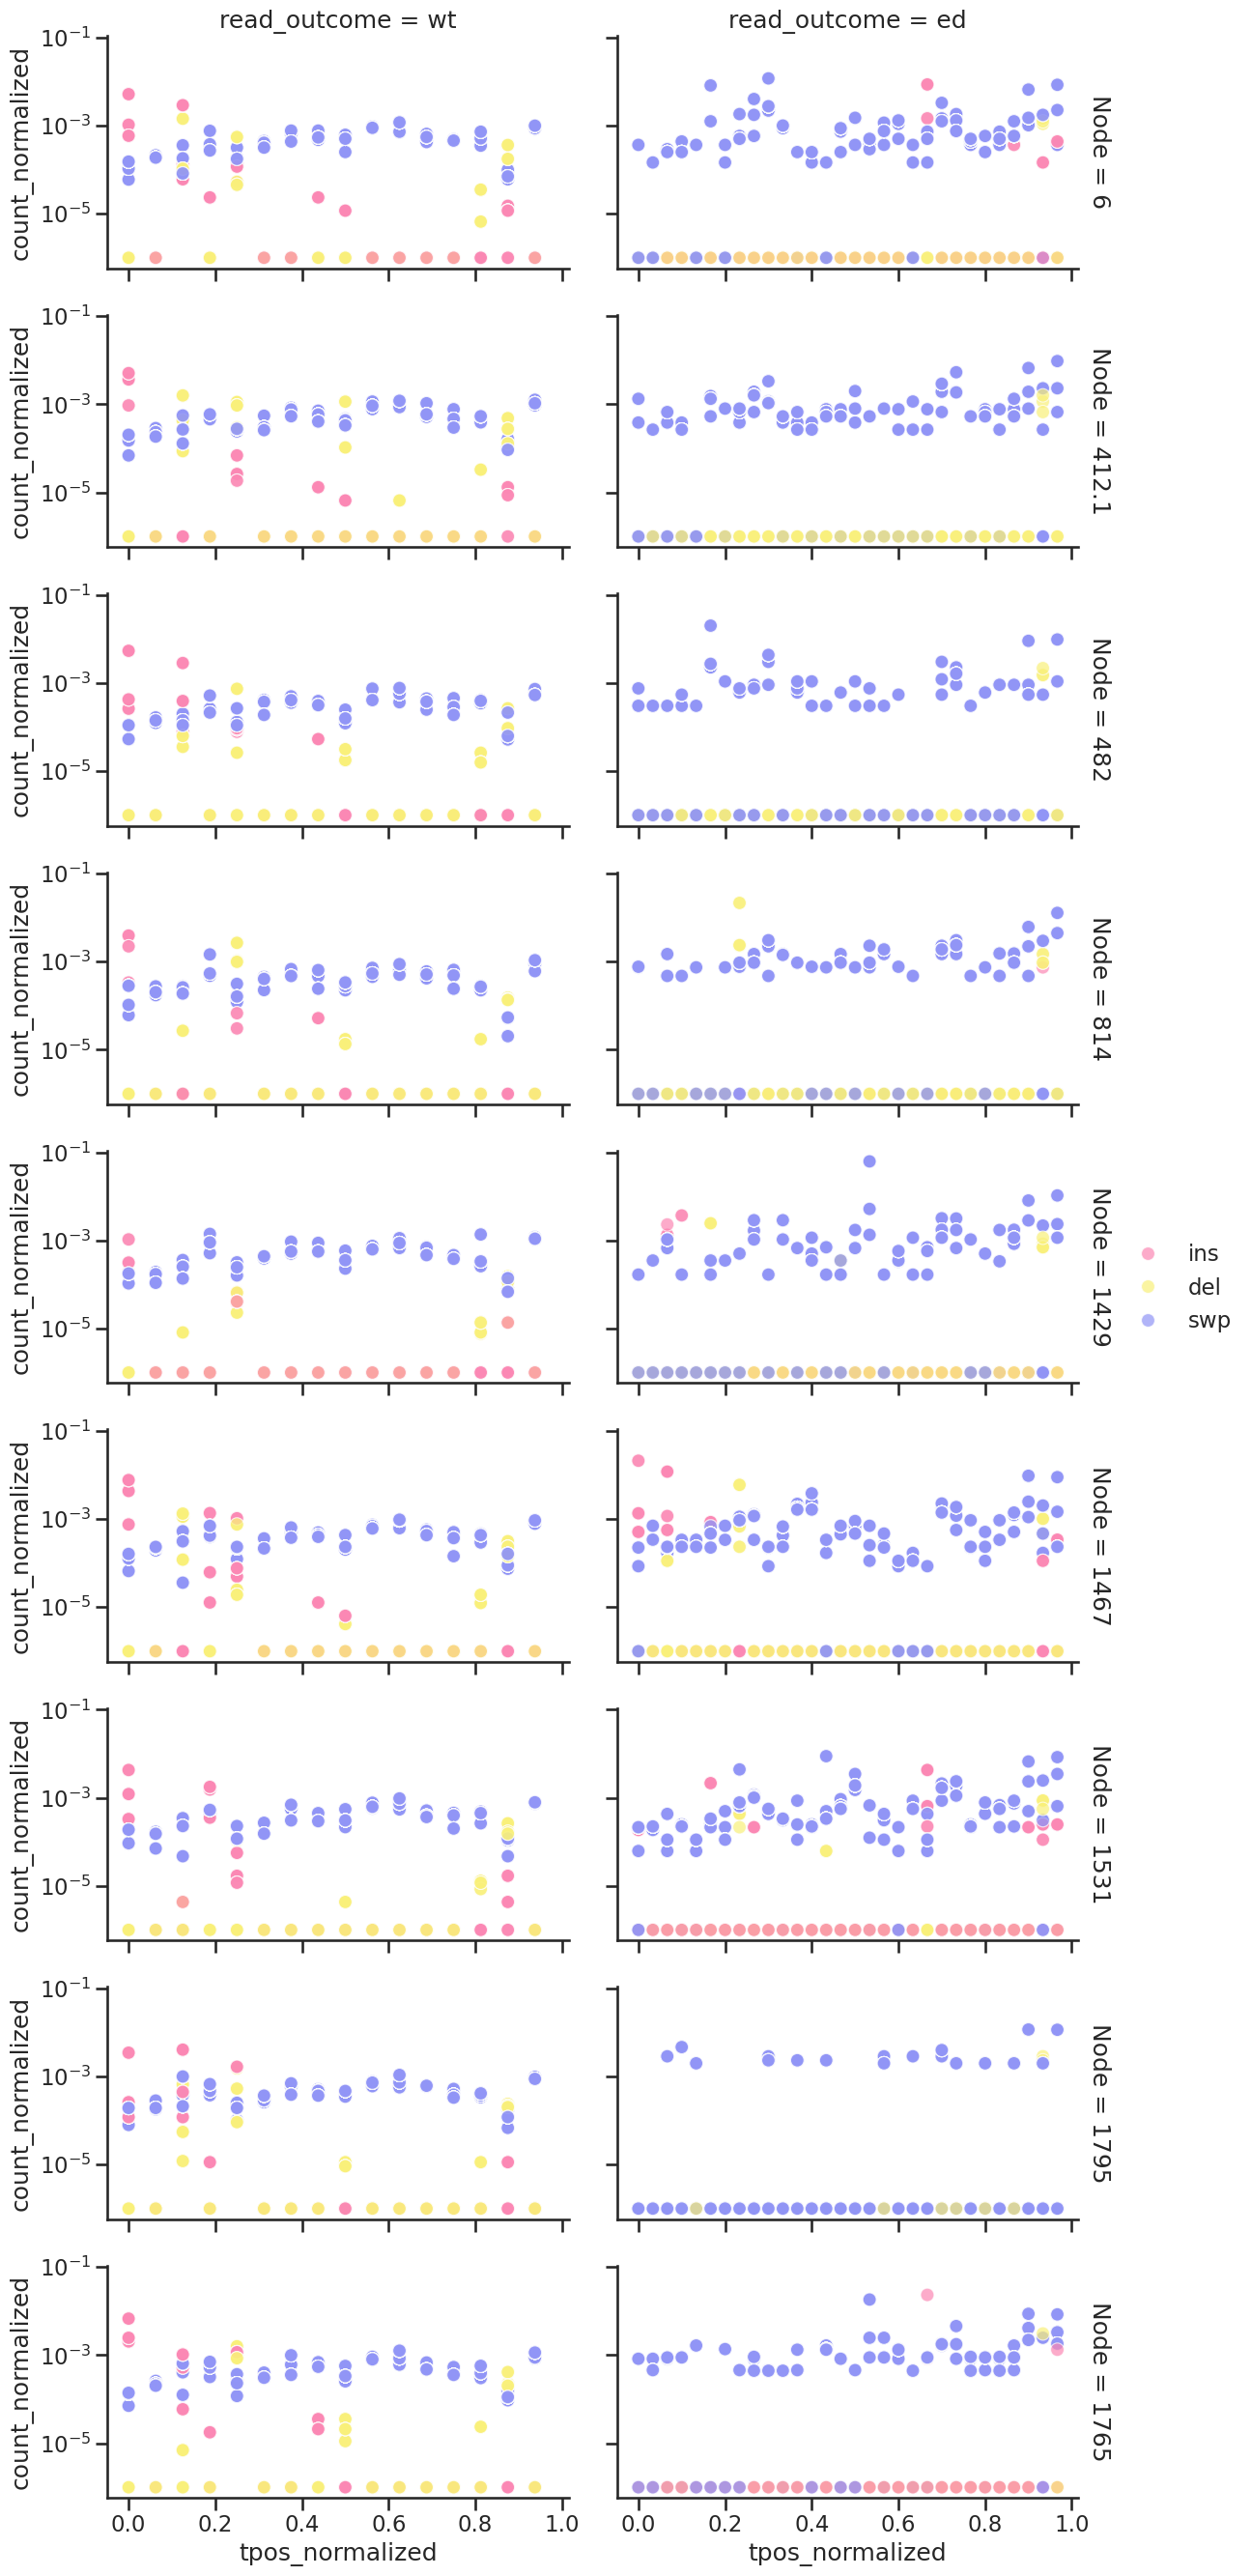

In [75]:
g = sns.FacetGrid(editerr_tpos[editerr_tpos['Catalytic']=='Live'], col="read_outcome",  row="Node", margin_titles=True, 
                  aspect=2,
                 )
g.map_dataframe(sns.scatterplot, 
                x="tpos_normalized", 
                y="count_normalized", 
                hue='type', 
                hue_order=['ins', 'del', 'swp'],
                palette=palette,
                s=100,
                alpha=0.7,
               )
g.set(yscale='log')
g.tight_layout()
g.add_legend()
g.savefig('files_out/fig9.png', format='png', bbox_inches='tight')